<a href="https://colab.research.google.com/github/kushshukla24/trading_decision_support_system/blob/master/WQU_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WQU Capstone Project | Group 18



## Project Description

### Project Track

We are interested in **Practical track** with focus on **Data-driven Swing Trading Decision System** for our capstone project.

### Problem statement

The fear of losing the capital investment in uncertain markets of equities withdraws a lot of retail investors in Indian market. The UN-quantified uncertainty even exaggerates the riskiness associated with the equity investment. To put it into numbers, only 2% of India's population invests in the stock market. Within this small percent of investors also, many investors fall prey to unscrupulous stock trading and lose capital, which even aggravates the fear of trading among masses. The primary reasons for such unscrupulous behaviour from the investors is the lack of education, quantification and thinking framework for dealing with the securities market.

We believe investors can make better informed decisions if educated with trading philosophy, risk involved and expectations from the investments. We therefore, would like to present retail investors with the quantitative tools and framework containing correct, contextual, quantified public information and logical steps to trade. We would like to bring contextual information and decision pointers right in front of the retail investors to bridge this gap. This is an effort to enable investors to be a better data-driven trader.

The trading decision system we propose to build will demonstrate the transformation of idea to strategy. The system will present the rationale behind certain decisions, applies it to real market conditions, analyzes and presents the result. We will evaluate several ideas and generate trading strategies in this project and present the same.

### Goals and Objectives

The goal of this project is to develop a data-driven swing trading decision system for retail investors. The system aims to help traders to make sound decisions on selecting trade based on their risk appetite by transforming ideas to trades by self-evaluating the key fundamentals, risk analysis and results from backtesting associated with the security transactions, instead of blindly taking up position on some security. The system wishes to be the answer of why this trading decision for retail investors.


## Objectives:
* Identify the stock universe for trading based on qualitative and fundamentals examination.
     
* Perform technical analysis and figure out useful indicators and patterns from daily historical price data of stocks from the universe.
     
* Perform feature engineering on extracted and synthesized data. Risk analysis of market, sector, macro, and micro economic data.
     
* Learn various ML/Non-ML models to produce trading size, signals and strategies and understand the rational behind it.
     
* Backtest model and strategies on numerous time-lines and price series to evaluate performance and robustness.
     
* Present the analysis, strategies derived along with the backtest results to enable retail investor for informed decision making.






## Common Code Required for all sections



In [1]:
# Installing yfinance to easily extract daiy price of securities from yahoo finance!
!pip install yfinance --upgrade --no-cache-dir

# Installing ta-lib for easy technical analysis
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=a3f6b2ff6b09ce1545fbebe8a889db1509e8be3a0329e43d6622b094713a6eff
  Stored in directory: /tmp/pip-ephem-wheel-cache-kwqd8fjh/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance
--2020-05-14 17:33:07--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2020-05-14 17:33:07--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sour

In [2]:
%matplotlib inline

import requests
import pandas as pd
import numpy as np
import yfinance as yf
import talib
import random
from datetime import datetime, timedelta
import tqdm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from itertools import compress
from collections import deque
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,7)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# These tickers are extracted after applying the required criterion from the 
# stock universe section.
tickers = ["ABBOTINDIA.NS", "HONAUT.NS", "LALPATHLAB.NS",
                    "HEXAWARE.NS", "NIITTECH.NS", "SANOFI.NS",
                    "AJANTPHARM.NS", "APLLTD.NS", "SYMPHONY.NS",
                    "GODREJAGRO.NS", "GUJGASLTD.NS", "ALKEM.NS", 
                    "SIS.NS", "HATSUN.NS", "GODREJIND.NS",
                    "PHOENIXLTD.NS", "ITI.NS", "INDIGO.NS"]

## Objective 1 : Identify the stock universe.

Q1. What is the market from where you will selecting the stocks? and why?

A1: We decided to explore the Indian market because 
  * It is one of the biggest and oldest financial market of the world. 
  * I invest and would like to invest more money in this market.
  
There are 2 major stock exchanges in Indian stock market. 
-   BSE (Bombay Stock Exchange)
-   NSE (National Stock Exchange)
  
Though BSE is older and higher number of companies are listed than NSE, when it comes to trading volume, NSE wins hands down, ensuring higher liquidity and better price discovery.

  As of 27/03/2020, there are 1384 companies are listed on NSE.
  https://www1.nseindia.com/education/content/reports/eq_research_reports_listed.htm

Due to these reasons, we selected NSE, India which will be first filters for the stock universe identification. 



Q2. How frequently are you going to change from Stock Universe? and why?

A2: We will sample our stock universe every quarter because its mandated by SEBI (Securities and Exchange Board of India) for the listed companies to present the unaudited quaterly reports (in effect since March 31, 2000) quaterly. This will allow us to place our framework in place every quarter to resample the stock universe with new data in place.



Q3. What will be the criterion to select the stocks for the universe?

A3: We will be doing swing trading, so the picked trades will last maximum of 3 months (realizing the profit/loss within this duration), so here will be the strategy to select the stock universe:

**Criterion 1**: Big Stable Companies only. This criterion mitigates the risk of company taking huge dips in a maximum 3 months time-frame.

**Quantification:** Market Capitalization > Rs. 5000cr 

**Criterion 2**:
YoY Sales Growth : company is performing and building products better and better.
YoY Profit Growth: for reduced cost operations and more profit.
The reason for Year-on-Year growth taken into consideration is that there could be seasonality involved in the business and hence to avoid the effect of seasonality in evaluation of company.

**Quantification:**
YOY Quarterly sales growth  > 10 and
YOY Quarterly profit growth  > 25 and
Net Profit latest quarter  > 1  


**Criterion 3**:
This criterion will ensure that company can take care of its debt obligations well

**Quantification:**
Debt to equity < 1.5
Interst Coverage Ratio > 2


**Criterion 4**. Keep companies from different sectors, to ensure that option of taking position in alternate sector is always present.

**Quantification:** At least 5 different sectors should be represented.

**Criterion 5**. Future expectation of sales and profit growth should also be postive.

**Quantification:**
Expected quarterly sales growth > 10 AND
Expected quarterly operating profit > 1

**Criterion 6**. We believe promotor holdings in the company is an important measure of how much trust the promotors have on their functioning, so this criterion is again to provide extra cushion against the risk involved while stock selection. 

**Quantification:**
Promotor Holding > 50

Q4. What is the metric that will tell that the proper stock universe is selected? and why?

A4. With all the above criterion applied, we should have more than 15 rock-solid companies from atleast 5 different sectors in place where we can place the trades and restrict over down-side risk.


Q5. What will be the count of securities, may be min-max boundaries of securities in your universe?

A5. Given the fact, once we chose the stock universe we will be closely examining the price values for all the stocks in the universe periodically, we believe a number between 15-50 stocks is best.
In case, with the applied criterion we do below 15 companies, we will relax the threshold for the criterion otherwise if no. of stocks in the universe are more than 50 we will tighten the criterion to keep the no. of stocks in universe under control.


**CODE**

We will utilize the heavily used website for stock screening in Indian Market, where we can shoot the query and the site does the screening. Here is the URL for the established criterion for stock selection:

https://www.screener.in/screen/raw/?sort=&order=&source=&query=Market+Capitalization+%3E+5000+AND%0D%0ADebt+to+equity+%3C1.5+AND%0D%0AYOY+Quarterly+sales+growth+%3E10+AND%0D%0AYOY+Quarterly+profit+growth+%3E15+AND%0D%0ANet+Profit+latest+quarter+%3E+1+AND%0D%0AInterest+Coverage+Ratio+%3E2+AND%0D%0AExpected+quarterly+sales+growth+%3E+10+AND%0D%0AExpected+quarterly+operating+profit+%3E+1+AND%0D%0APromoter+holding+%3E+50&latest=on

In [0]:
# Login Credentials | Need to Hide
payload = {
    'username': 'kushukla@ymail.com',
    'password': 'realmadrid'
}

login_url = "https://www.screener.in/login/"
universe_screen_url = "https://www.screener.in/screen/raw/?sort=&order=&source=&query=Market+Capitalization+%3E+5000+AND%0D%0ADebt+to+equity+%3C1.5+AND%0D%0AYOY+Quarterly+sales+growth+%3E10+AND%0D%0AYOY+Quarterly+profit+growth+%3E15+AND%0D%0ANet+Profit+latest+quarter+%3E+1+AND%0D%0AInterest+Coverage+Ratio+%3E2+AND%0D%0AExpected+quarterly+sales+growth+%3E+10+AND%0D%0AExpected+quarterly+operating+profit+%3E+1+AND%0D%0APromoter+holding+%3E+50&latest=on"

df = None
with requests.Session() as s:
    s.get(login_url)
    payload['csrfmiddlewaretoken'] = s.cookies['csrftoken']

    r = s.post(login_url, data=payload, headers={"Referer":	login_url})

    # Just a text unique from after successful login to further extract the
    # the universe of stocks 
    if "Add companies to your watchlist" in str(r.content):  
      r = s.get(universe_screen_url)
      
      df = pd.read_html(r.text)[0]
      rows_to_drop = range(15, df.shape[0], 15)
      df.drop(rows_to_drop, axis=0, inplace=True)
    else:
      print("Not find the required text. Login to Screener Failed!")

# finding the yahoo tickers corresponding to the companies is a manual process, 
# but we will be saving this mapping and over time we
# have to minimally search for the ticker manually
df["Ticker"] = np.array(tickers)

In [0]:
# Code for saving the tickers as csv in the Google Drive
from google.colab import drive
drive.mount('drive')
df[["Name", "Ticker"]].to_csv("CompanyNameTickerMappings.csv", index=False)
!cp CompanyNameTickerMappings.csv "drive/My Drive/Colab Notebooks/"

## Data Extraction

In [6]:
tickers_to_download = " ".join(tickers)
df = yf.download(tickers_to_download, start="2015-03-25", end="2020-03-25")
df

[*********************100%***********************]  18 of 18 completed


Adj Close                ...    Volume            
           ABBOTINDIA.NS AJANTPHARM.NS  ...    SIS.NS SYMPHONY.NS
Date                                    ...                      
2015-03-25   3620.394775   1132.045410  ...       NaN      105906
2015-03-26   3666.935303   1153.116089  ...       NaN       16008
2015-03-27   3857.845947   1159.225708  ...       NaN       27186
2015-03-30   3788.899170   1172.551147  ...       NaN       69558
2015-03-31   3792.881592   1182.461304  ...       NaN       23398
...                  ...           ...  ...       ...         ...
2020-03-18  14238.799805   1230.199951  ...   23150.0      142234
2020-03-19  13249.299805   1189.400024  ...   87176.0       39513
2020-03-20  14736.799805   1204.300049  ...  123511.0       24172
2020-03-23  13271.000000   1039.199951  ...   41542.0       32539
2020-03-24  13841.500000   1063.150024  ...   22767.0       26227

[1230 rows x 108 columns]

## Objective 2: Perform quantitative analysis on the daily historical price data of stocks from the universe.

Now since we have established our universe of stock and extracted the 5 years time series, its time to fetch the historical price time series of the data and explore.

**Assumption**
1. Adjusted Close is the price of the stock on any given trading day.
2. There is 0.1% commission/fees/charges associated with any stock transaction.
3. We will buy a unit quantity of each stock and adopt buy, hold and sell strategy.


In [5]:
cols = [('Adj Close', t) for t in tickers]
working_df = df[cols]
working_df.columns = [t for t in tickers]
working_df = working_df.pct_change()
working_df

ABBOTINDIA.NS  HONAUT.NS  ...    ITI.NS  INDIGO.NS
Date                                  ...                     
2015-03-25            NaN        NaN  ...       NaN        NaN
2015-03-26       0.012855   0.007276  ... -0.055172        NaN
2015-03-27       0.052063  -0.021695  ... -0.053528        NaN
2015-03-30      -0.017872   0.031780  ...  0.056555        NaN
2015-03-31       0.001051  -0.006947  ... -0.019465        NaN
...                   ...        ...  ...       ...        ...
2020-03-18      -0.044677  -0.075938  ... -0.058024  -0.027439
2020-03-19      -0.069493  -0.080084  ... -0.072185  -0.042847
2020-03-20       0.112270   0.018616  ...  0.180498  -0.041245
2020-03-23      -0.099465  -0.199998  ... -0.115993  -0.016921
2020-03-24       0.042988   0.081817  ... -0.008946   0.069316

[1231 rows x 18 columns]

In [6]:
working_df.count()

ABBOTINDIA.NS    1230
HONAUT.NS        1230
LALPATHLAB.NS    1046
HEXAWARE.NS      1230
NIITTECH.NS      1230
SANOFI.NS        1230
AJANTPHARM.NS    1230
APLLTD.NS        1230
SYMPHONY.NS      1230
GODREJAGRO.NS     599
GUJGASLTD.NS     1110
ALKEM.NS         1046
SIS.NS            643
HATSUN.NS        1230
GODREJIND.NS     1230
PHOENIXLTD.NS    1230
ITI.NS           1230
INDIGO.NS        1074
dtype: int64

The above cell represents the number of daily stock price data availabe for each ticker symbol.

Following symbols contains data for full extracted 5 years period:
ABBOTINDIA.NS, HONAUT.NS, HEXAWARE.NS, NIITTECH.NS, SANOFI.NS, AJANTPHARM.NS, APLLTD.NS, SYMPHONY.NS, HATSUN.NS, GODREJIND.NS, PHOENIXLTD.NS, ITI.NS

while for other all 5 years content in not available

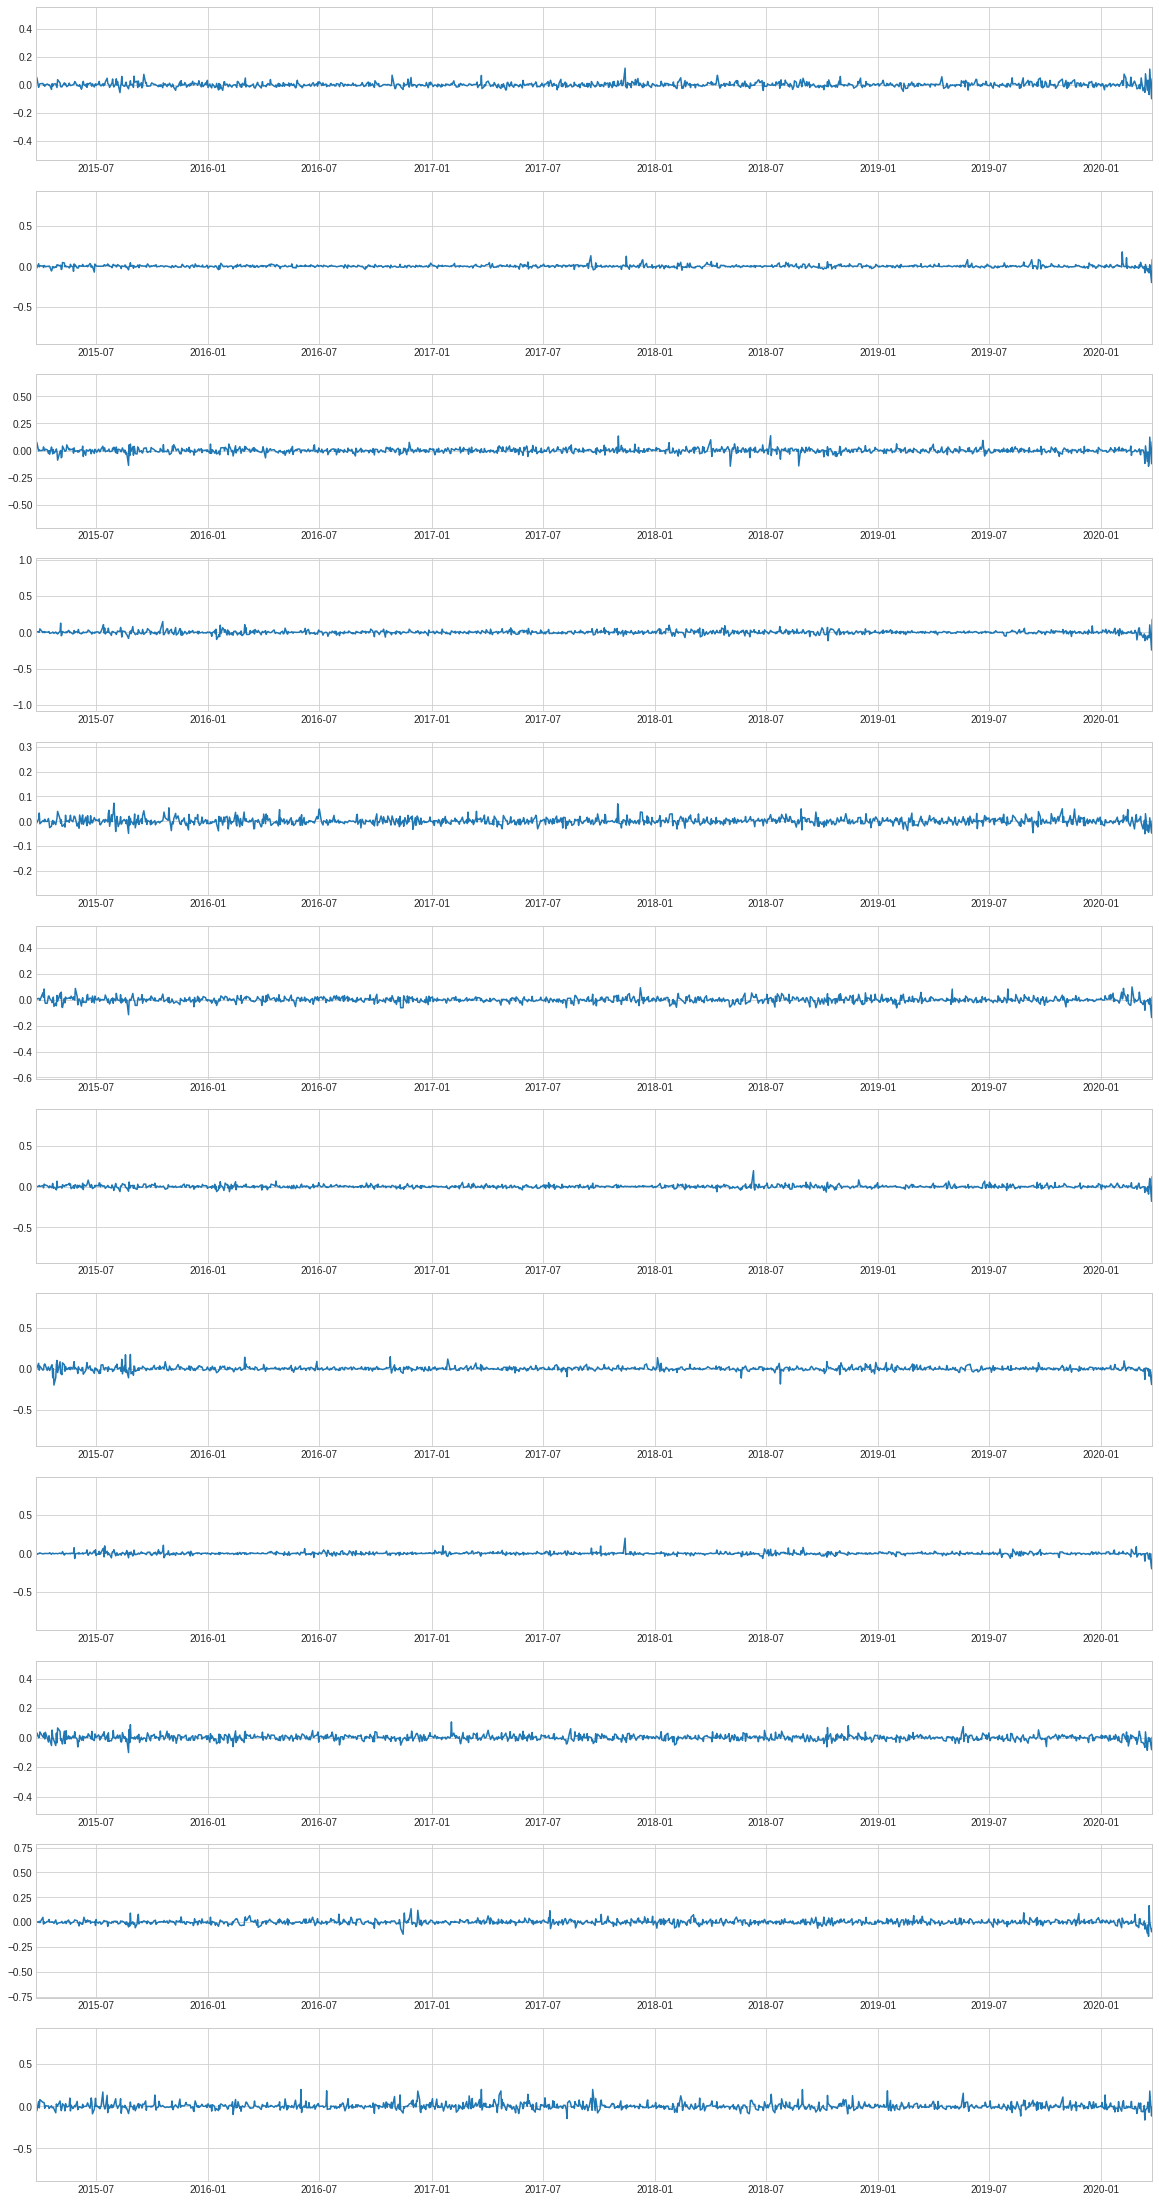

In [7]:
five_years_data_stocks = ["ABBOTINDIA.NS", "HONAUT.NS", "HEXAWARE.NS", \
"NIITTECH.NS", "SANOFI.NS", "AJANTPHARM.NS", "APLLTD.NS", "SYMPHONY.NS", \
"HATSUN.NS", "GODREJIND.NS", "PHOENIXLTD.NS", "ITI.NS"]

plt.rcParams["figure.figsize"] = (20,40)
for i, col in enumerate(five_years_data_stocks):
  ax = plt.subplot(len(five_years_data_stocks), 1, i+1)
  ax.margins(0, 2)
  ax.plot(working_df.index, working_df.loc[:, col])

The selected plots for the daily log returns seems to be meandering around the mean of 0% return. Lets checkout if all these processes are stationary.

In [0]:
# Employing Augmented Dicker Fuller and KPSS test of stationarity 
# on these log return series at 5% significance level
data = {"ticker": [], "adf": [], "kpss": []}
for i, col in enumerate(five_years_data_stocks):
  data["ticker"].append(col)
  data["adf"].append(adfuller(working_df[col].dropna(), autolag='AIC')[1]>0.05)
  data["kpss"].append(kpss(working_df[col].dropna())[1]<0.05)

pd.DataFrame(data)

The above results clearly shows that though the return series look somewhat meandering around 0% return are in actual not stationary. Though there are methods through which we can make the series stationary by differencing, but we will avoid that approach as it is not generic in nature.

This way we are avoiding to model these tim series through ARIMA models.

### VaR Analysis

We are in trade to make money, but due to the dynamics of the market its possible to even lose money and this is factor of fear for most of the investors. Lets quantify the associated risk with the daily trade.



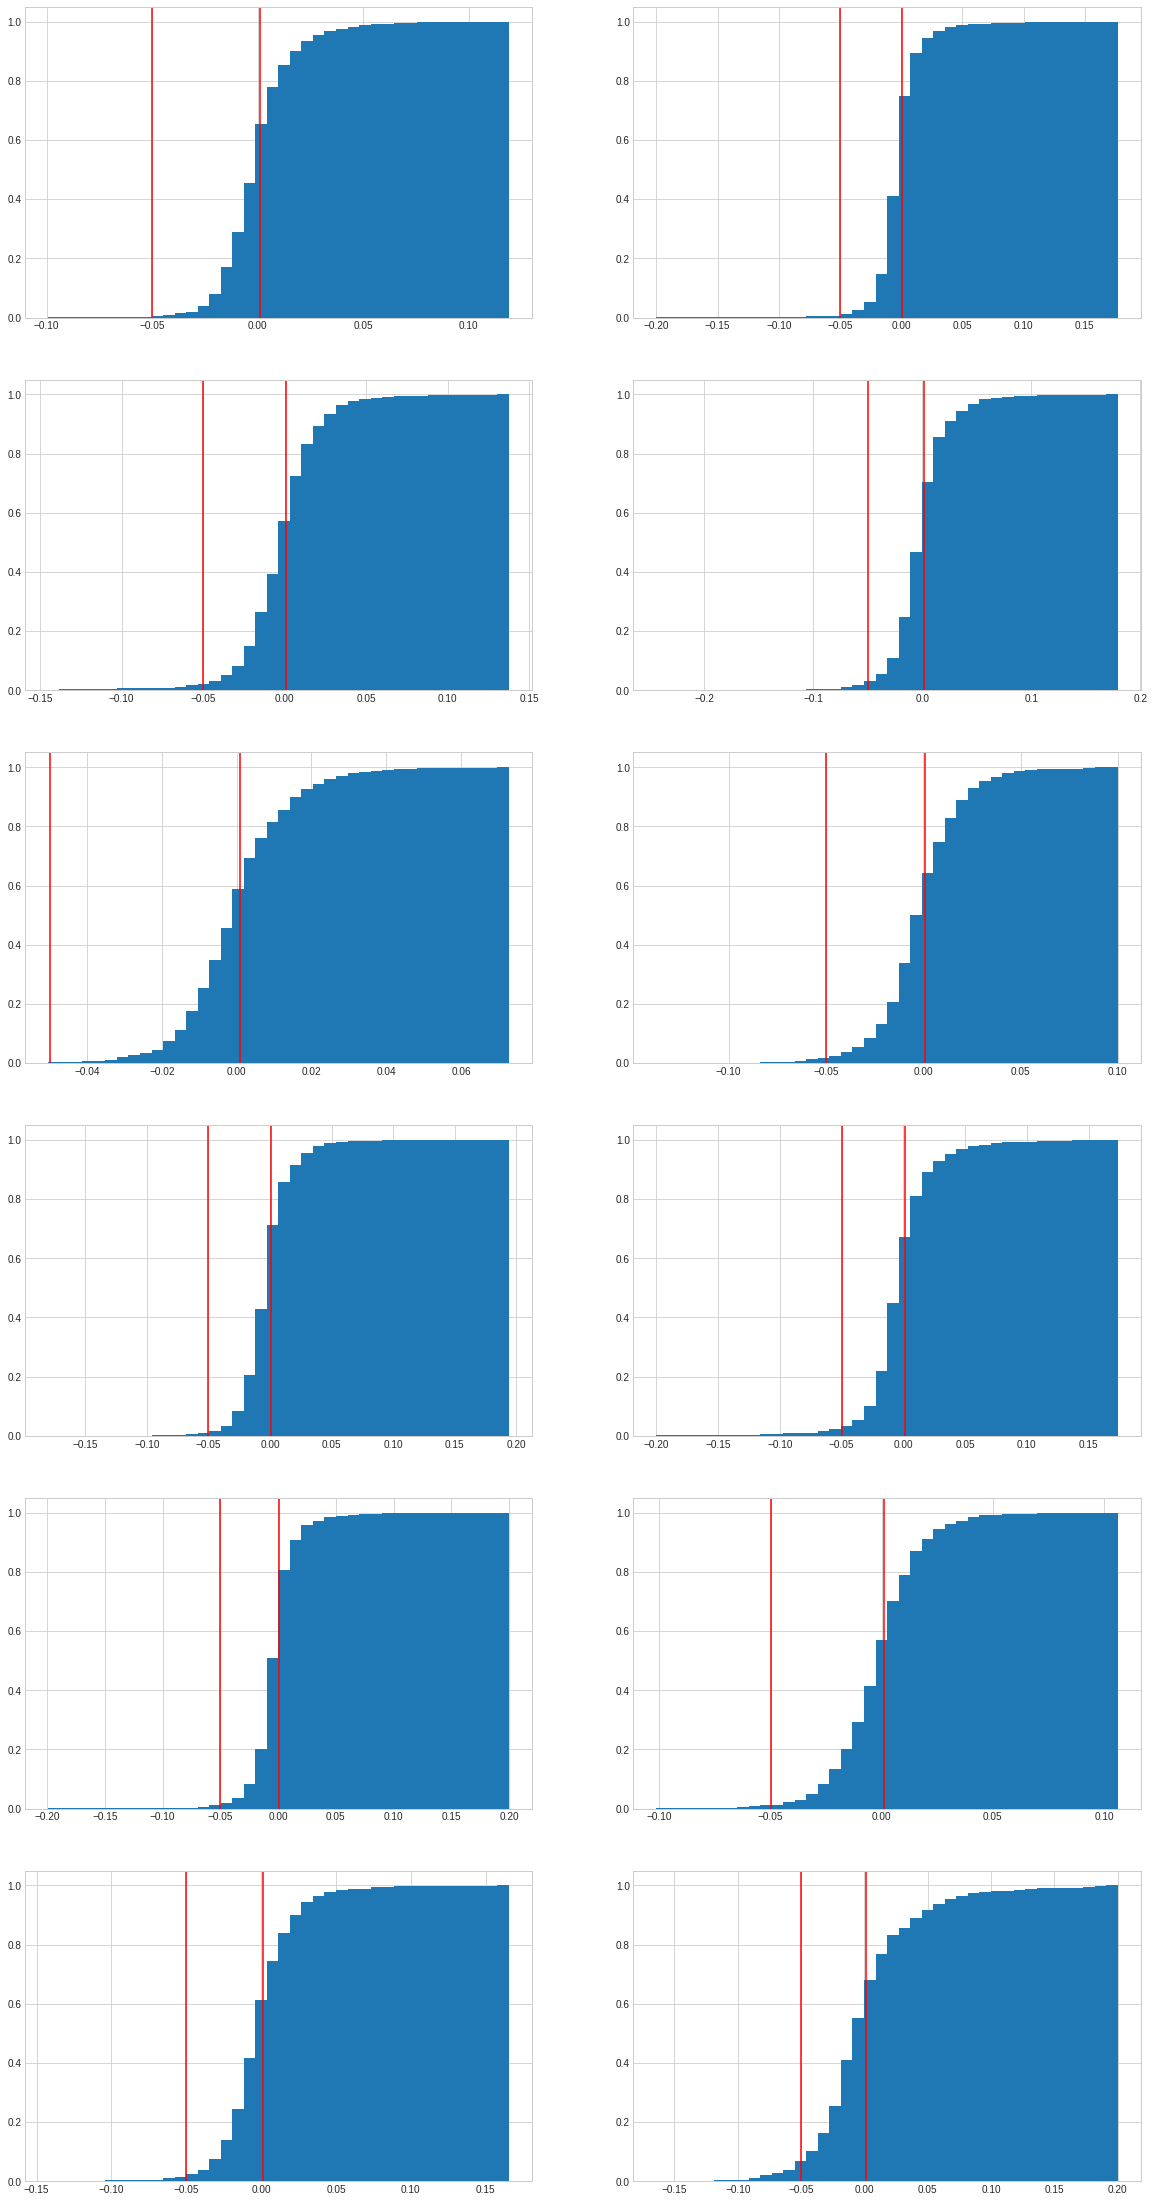

In [0]:
plt.rcParams["figure.figsize"] = (20,40)
fig, axes = plt.subplots(nrows=6, ncols=2)
for i, col in enumerate(five_years_data_stocks):
  ax_row, ax_col = i//2, i%2
  ax = axes[ax_row, ax_col]
  ax.axvline(x=0.001, color='r')
  ax.axvline(x=-0.05, color='r')
  working_df[col].hist(cumulative=True, density=1, bins=40, ax=ax)


In [8]:
chances = {
    "ticker": [],
    "lose":[],
    "lose >2%": [],
    "gain >5%": []
}
for t in tickers:
  data = working_df[t].dropna()
  wf = pd.DataFrame()
  wf["Returns"] = np.sort(data)

  # calculate the proportional values of samples
  wf["Probability"] = 1. * np.arange(len(data)) / (len(data) - 1)
  chances["ticker"].append(t)
  chances["lose"].append(wf[wf["Returns"]<0.001].iloc[-1,1])
  chances["lose >2%"].append(wf[wf["Returns"]<-0.021].iloc[-1,1])
  chances["gain >5%"].append(1. - wf[wf["Returns"]<0.051].iloc[-1,1])

pd.DataFrame(chances).set_index("ticker")

lose  lose >2%  gain >5%
ticker                                     
ABBOTINDIA.NS  0.546786  0.049634  0.012205
HONAUT.NS      0.537836  0.052889  0.012205
LALPATHLAB.NS  0.555981  0.099522  0.019139
HEXAWARE.NS    0.511798  0.112286  0.018714
NIITTECH.NS    0.519121  0.117982  0.034988
SANOFI.NS      0.555736  0.035801  0.002441
AJANTPHARM.NS  0.550041  0.107404  0.013019
APLLTD.NS      0.554109  0.086249  0.013832
SYMPHONY.NS    0.574451  0.115541  0.032547
GODREJAGRO.NS  0.591973  0.088629  0.013378
GUJGASLTD.NS   0.525699  0.101894  0.018936
ALKEM.NS       0.530144  0.068900  0.003828
SIS.NS         0.554517  0.130841  0.029595
HATSUN.NS      0.545972  0.074858  0.015460
GODREJIND.NS   0.528885  0.100081  0.008137
PHOENIXLTD.NS  0.527258  0.117168  0.020342
ITI.NS         0.578519  0.223759  0.092758
INDIGO.NS      0.526561  0.131407  0.027959

The above tables and graph makes it clear, that making money with at-least these stocks is slightly less probable than to is not merely luck but will require skill.  

### Monte Carlo Simulations on the Price Series to understand the expected returns and risk involved

Here we will use the OHLC data of the historical price series to understand what to expect when we are getting ourself into a position of buying a given stock.

Returns: You will buy on the open price of day 1 of the sampling period and sell at the end of the closing price sampling period. 
So, returns will 
$$Sample Returns = \frac{FinalClosePrice - InitialOpenPrice}{InitialOpenPrice}$$

Risk: We are measuring the risk in terms of the Percent Max Drawdown, meaning suppose you bought at the highest price and sold at the lowest price in the sampling period. During the sampling period, max drawdown will be calculated as $$Sample Max Drawdown = \frac{Highest High - Lowest Low}{Highest High}$$

In [0]:
def get_random_subset_series(ticker, days=90):
  wf = df[[('Open', ticker),('High', ticker), ('Low', ticker), ('Close', ticker)]]
  wf.columns = ['Open', 'High', 'Low', 'Close']
  wf.dropna(inplace=True)
  data_size = wf.shape[0]
  from_date = wf.index.tolist()[random.randint(0,data_size-days-1)]
  to_date = from_date + timedelta(days=days)
  return wf[(wf.index >= from_date) & (wf.index < to_date)]

In [24]:
def simulate(ticker, nb_samples):
  result = {
      "return": [],
      "risk": [] 
  }
  for i in tqdm.tqdm(range(nb_samples)):
    sample_wf = get_random_subset_series(ticker)
    returns = (sample_wf["Close"].iloc[-1]-sample_wf["Open"].iloc[0])*100/sample_wf["Open"].iloc[0]
    result["return"].append(returns)
    max_drawdown = (sample_wf["High"].max() - sample_wf["Low"].min())*100/sample_wf["High"].max()
    result["risk"].append(max_drawdown)

  return pd.DataFrame(result)

simulate("ABBOTINDIA.NS", 10).describe(percentiles=[0.1, 0.2, 0.4, 0.6, 0.8, 0.9]).transpose().iloc[0,:]


100%|██████████| 10/10 [00:00<00:00, 97.73it/s]


count    10.000000
mean      4.713527
std       9.546767
min      -9.556734
10%      -1.483055
20%      -0.197411
40%       0.863940
50%       1.283351
60%       1.844494
80%      13.546178
90%      17.905879
max      21.857706
Name: return, dtype: float64

In [42]:
nb_samples = 10000
for i,t in enumerate(tickers):
  result = simulate(t, nb_samples).describe(percentiles=[0.1, 0.2, 0.4, 0.6, 0.8, 0.9])
  if not i:
    returns_df = result.iloc[:,0]
    risk_df = result.iloc[:,1]
    continue
  returns_df = pd.merge(returns_df, result.iloc[:,0], \
                    'inner', left_index=True, right_index=True)
  risk_df = pd.merge(risk_df, result.iloc[:,1], \
                    'inner', left_index=True, right_index=True)

returns_df.columns = [t for t in tickers]
risk_df.columns = [t for t in tickers]

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 10000/10000 [01:47<00:00, 93.13it/s]


In [52]:
returns_df.transpose().drop(["count", "10%", "20%", "40%", "60%", "80%", "90%"], axis=1).round(2)

mean    std    min   50%     max
ABBOTINDIA.NS   7.18  14.21 -22.02  2.48   47.68
HONAUT.NS       7.92  11.79 -25.41  8.98   45.30
LALPATHLAB.NS   4.98  13.59 -20.34  3.60   51.88
HEXAWARE.NS     2.03  13.70 -37.65  3.30   37.07
NIITTECH.NS     9.28  15.86 -29.98  7.94   50.76
SANOFI.NS       4.34   9.25 -17.14  2.76   30.61
AJANTPHARM.NS  -0.15  15.55 -33.00 -3.72   40.65
APLLTD.NS       1.49  14.34 -26.01 -1.37   66.12
SYMPHONY.NS     0.98  15.91 -41.17  1.48   49.66
GODREJAGRO.NS  -0.73  10.31 -21.93 -1.90   26.49
GUJGASLTD.NS    6.21  17.06 -23.34  2.63   61.67
ALKEM.NS        3.60  12.20 -22.16  2.27   40.82
SIS.NS          4.37  20.71 -35.55  3.78   62.52
HATSUN.NS       5.91  14.86 -21.13  4.54   52.83
GODREJIND.NS    1.67  12.21 -29.67  0.93   37.24
PHOENIXLTD.NS   4.95  11.65 -29.90  4.79   40.55
ITI.NS         10.56  29.25 -40.85  4.10  134.02
INDIGO.NS       3.54  18.67 -34.14  0.54   53.14

In [53]:
risk_df.transpose().drop(["count", "10%", "20%", "40%", "60%", "80%", "90%"], axis=1).round(2)

mean    std    min    50%    max
ABBOTINDIA.NS  18.60   6.86   5.87  17.60  37.99
HONAUT.NS      20.69   6.01   7.93  20.73  37.10
LALPATHLAB.NS  20.68   6.34   8.47  20.37  39.66
HEXAWARE.NS    22.20   6.21   8.40  21.53  39.11
NIITTECH.NS    24.49   7.44   8.05  24.95  40.38
SANOFI.NS      15.76   4.75   8.06  15.24  32.50
AJANTPHARM.NS  23.63   5.24  11.27  24.24  38.55
APLLTD.NS      19.99   6.53  10.36  18.71  44.29
SYMPHONY.NS    24.63   7.23   9.07  24.70  48.62
GODREJAGRO.NS  17.91   3.73  10.87  17.90  25.74
GUJGASLTD.NS   23.70   6.31  10.61  23.56  39.83
ALKEM.NS       19.18   5.05   7.65  18.90  32.29
SIS.NS         23.87   7.47   9.55  22.47  41.85
HATSUN.NS      23.01   7.39   6.56  24.17  37.27
GODREJIND.NS   20.83   4.25  12.09  21.27  33.93
PHOENIXLTD.NS  22.90   5.85  13.47  22.57  36.94
ITI.NS         35.54  10.28  17.31  34.66  65.81
INDIGO.NS      26.48   8.19  12.88  26.29  49.93

The table above is helpful in developing some intuition based on the past price history of price stock as what to expect and with how much risk when entering certain stock position.

We feel mean is good appoximation for expected returns and risk, because in the monte carlo simulation performed above on random 3 months period, this is what we get hand use a simple buy, hold and sell strategy.

## Objective 3 | Perform Technical analysis on the daily historical price data of stocks from the universe.

The qunatitative analysis gave us some ideaa about the behavior of the stock from the past history. Now in this section we will perform technical analysis to understand the price action of these historic price series.

In [0]:
def get_ohlcv(ticker):
  wf = df.loc[:, [('Adj Close', ticker), ('Open', ticker),('High', ticker), ('Low', ticker), ('Close', ticker), ('Volume', ticker)]]
  wf.columns = ['Adj Close', 'Open', 'High', 'Low', 'Close', 'Volume']
  wf.dropna(inplace=True)
  return wf

candle_names = talib.get_function_groups()['Pattern Recognition']
wf = get_ohlcv("ABBOTINDIA.NS")

In [9]:
for candle in candle_names:
    wf.loc[:, candle] = getattr(talib, candle)(wf["Open"], wf["High"], wf["Low"], wf["Close"])
wf.iloc[:, 5:]

Volume  CDL2CROWS  ...  CDLUPSIDEGAP2CROWS  CDLXSIDEGAP3METHODS
Date                           ...                                         
2015-03-25    1473          0  ...                   0                    0
2015-03-26    5650          0  ...                   0                    0
2015-03-27    8497          0  ...                   0                    0
2015-03-30    5389          0  ...                   0                    0
2015-03-31    3613          0  ...                   0                    0
...            ...        ...  ...                 ...                  ...
2020-03-18   39061          0  ...                   0                    0
2020-03-19   33398          0  ...                   0                    0
2020-03-20   25956          0  ...                   0                 -100
2020-03-23   16933          0  ...                   0                    0
2020-03-24   11762          0  ...                   0                    0

[1230 rows x 62 columns]

In [0]:
# Note - 1
# Only some patterns have bull and bear versions. 
# However, to make the process unified and for codability purposes 
# all patterns are labeled with "_Bull" and "_Bear" tags.
# Both versions of the single patterns are given same performance rank, 
# since they will always return only 1 version.  

# Note - 2 
# Following TA-Lib patterns are excluded from the analysis since the corresponding ranking not found:
# CounterAttack, Longline, Shortline, Stalledpattern, Kickingbylength


candle_rankings = {
        "CDL3LINESTRIKE_Bull": 1,
        "CDL3LINESTRIKE_Bear": 2,
        "CDL3BLACKCROWS_Bull": 3,
        "CDL3BLACKCROWS_Bear": 3,
        "CDLEVENINGSTAR_Bull": 4,
        "CDLEVENINGSTAR_Bear": 4,
        "CDLTASUKIGAP_Bull": 5,
        "CDLTASUKIGAP_Bear": 5,
        "CDLINVERTEDHAMMER_Bull": 6,
        "CDLINVERTEDHAMMER_Bear": 6,
        "CDLMATCHINGLOW_Bull": 7,
        "CDLMATCHINGLOW_Bear": 7,
        "CDLABANDONEDBABY_Bull": 8,
        "CDLABANDONEDBABY_Bear": 8,
        "CDLBREAKAWAY_Bull": 10,
        "CDLBREAKAWAY_Bear": 10,
        "CDLMORNINGSTAR_Bull": 12,
        "CDLMORNINGSTAR_Bear": 12,
        "CDLPIERCING_Bull": 13,
        "CDLPIERCING_Bear": 13,
        "CDLSTICKSANDWICH_Bull": 14,
        "CDLSTICKSANDWICH_Bear": 14,
        "CDLTHRUSTING_Bull": 15,
        "CDLTHRUSTING_Bear": 15,
        "CDLINNECK_Bull": 17,
        "CDLINNECK_Bear": 17,
        "CDL3INSIDE_Bull": 20,
        "CDL3INSIDE_Bear": 56,
        "CDLHOMINGPIGEON_Bull": 21,
        "CDLHOMINGPIGEON_Bear": 21,
        "CDLDARKCLOUDCOVER_Bull": 22,
        "CDLDARKCLOUDCOVER_Bear": 22,
        "CDLIDENTICAL3CROWS_Bull": 24,
        "CDLIDENTICAL3CROWS_Bear": 24,
        "CDLMORNINGDOJISTAR_Bull": 25,
        "CDLMORNINGDOJISTAR_Bear": 25,
        "CDLXSIDEGAP3METHODS_Bull": 27,
        "CDLXSIDEGAP3METHODS_Bear": 26,
        "CDLTRISTAR_Bull": 28,
        "CDLTRISTAR_Bear": 76,
        "CDLGAPSIDESIDEWHITE_Bull": 46,
        "CDLGAPSIDESIDEWHITE_Bear": 29,
        "CDLEVENINGDOJISTAR_Bull": 30,
        "CDLEVENINGDOJISTAR_Bear": 30,
        "CDL3WHITESOLDIERS_Bull": 32,
        "CDL3WHITESOLDIERS_Bear": 32,
        "CDLONNECK_Bull": 33,
        "CDLONNECK_Bear": 33,
        "CDL3OUTSIDE_Bull": 34,
        "CDL3OUTSIDE_Bear": 39,
        "CDLRICKSHAWMAN_Bull": 35,
        "CDLRICKSHAWMAN_Bear": 35,
        "CDLSEPARATINGLINES_Bull": 36,
        "CDLSEPARATINGLINES_Bear": 40,
        "CDLLONGLEGGEDDOJI_Bull": 37,
        "CDLLONGLEGGEDDOJI_Bear": 37,
        "CDLHARAMI_Bull": 38,
        "CDLHARAMI_Bear": 72,
        "CDLLADDERBOTTOM_Bull": 41,
        "CDLLADDERBOTTOM_Bear": 41,
        "CDLCLOSINGMARUBOZU_Bull": 70,
        "CDLCLOSINGMARUBOZU_Bear": 43,
        "CDLTAKURI_Bull": 47,
        "CDLTAKURI_Bear": 47,
        "CDLDOJISTAR_Bull": 49,
        "CDLDOJISTAR_Bear": 51,
        "CDLHARAMICROSS_Bull": 50,
        "CDLHARAMICROSS_Bear": 80,
        "CDLADVANCEBLOCK_Bull": 54,
        "CDLADVANCEBLOCK_Bear": 54,
        "CDLSHOOTINGSTAR_Bull": 55,
        "CDLSHOOTINGSTAR_Bear": 55,
        "CDLMARUBOZU_Bull": 71,
        "CDLMARUBOZU_Bear": 57,
        "CDLUNIQUE3RIVER_Bull": 60,
        "CDLUNIQUE3RIVER_Bear": 60,
        "CDL2CROWS_Bull": 61,
        "CDL2CROWS_Bear": 61,
        "CDLBELTHOLD_Bull": 62,
        "CDLBELTHOLD_Bear": 63,
        "CDLHAMMER_Bull": 65,
        "CDLHAMMER_Bear": 65,
        "CDLHIGHWAVE_Bull": 67,
        "CDLHIGHWAVE_Bear": 67,
        "CDLSPINNINGTOP_Bull": 69,
        "CDLSPINNINGTOP_Bear": 73,
        "CDLUPSIDEGAP2CROWS_Bull": 74,
        "CDLUPSIDEGAP2CROWS_Bear": 74,
        "CDLGRAVESTONEDOJI_Bull": 77,
        "CDLGRAVESTONEDOJI_Bear": 77,
        "CDLHIKKAKEMOD_Bull": 82,
        "CDLHIKKAKEMOD_Bear": 81,
        "CDLHIKKAKE_Bull": 85,
        "CDLHIKKAKE_Bear": 83,
        "CDLENGULFING_Bull": 84,
        "CDLENGULFING_Bear": 91,
        "CDLMATHOLD_Bull": 86,
        "CDLMATHOLD_Bear": 86,
        "CDLHANGINGMAN_Bull": 87,
        "CDLHANGINGMAN_Bear": 87,
        "CDLRISEFALL3METHODS_Bull": 94,
        "CDLRISEFALL3METHODS_Bear": 89,
        "CDLKICKING_Bull": 96,
        "CDLKICKING_Bear": 102,
        "CDLDRAGONFLYDOJI_Bull": 98,
        "CDLDRAGONFLYDOJI_Bear": 98,
        "CDLCONCEALBABYSWALL_Bull": 101,
        "CDLCONCEALBABYSWALL_Bear": 101,
        "CDL3STARSINSOUTH_Bull": 103,
        "CDL3STARSINSOUTH_Bear": 103,
        "CDLDOJI_Bull": 104,
        "CDLDOJI_Bear": 104
    }

In [0]:
wf['cs_pattern'] = np.nan
wf['cs_matches'] = np.nan
wf['cs_bull_matches'] = np.nan
wf['cs_bear_matches'] = np.nan
for index, row in wf.iterrows():

    # no pattern found
    if len(row[candle_names]) - sum(row[candle_names] == 0) == 0:
        wf.loc[index,'cs_pattern'] = "NO_PATTERN"
        wf.loc[index, 'cs_matches'] = 0
        wf.loc[index, 'cs_bull_matches'] = 0
        wf.loc[index, 'cs_bear_matches'] = 0
    # single pattern found
    elif len(row[candle_names]) - sum(row[candle_names] == 0) == 1:
        # bull pattern 100 or 200
        if any(row[candle_names].values > 0):
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bull'
            wf.loc[index, 'cs_pattern'] = pattern
            wf.loc[index, 'cs_matches'] = 1
            wf.loc[index, 'cs_bull_matches'] = 1
            wf.loc[index, 'cs_bear_matches'] = 0
        # bear pattern -100 or -200
        else:
            pattern = list(compress(row[candle_names].keys(), row[candle_names].values != 0))[0] + '_Bear'
            wf.loc[index, 'cs_pattern'] = pattern
            wf.loc[index, 'cs_matches'] = 1
            wf.loc[index, 'cs_bull_matches'] = 0
            wf.loc[index, 'cs_bear_matches'] = 1
    # multiple patterns matched -- select best performance
    else:
        # filter out pattern names from bool list of values
        patterns = list(compress(row[candle_names].keys(), row[candle_names].values != 0))
        bull_container = []
        bear_container = []
        container = []
        for pattern in patterns:
            if pattern=="CDLCOUNTERATTACK" or \
              pattern=="CDLSHORTLINE" or \
              pattern=="CDLLONGLINE" or \
              pattern=="CDLSTALLED" or \
              pattern=="KICKINGBYLENGTH":
              continue
            if row[pattern] > 0:
                bull_container.append(pattern + '_Bull')
                container.append(pattern + '_Bull')
            else:
                bear_container.append(pattern + '_Bear')
                container.append(pattern + '_Bear')
        rank_list = [candle_rankings[p] for p in container]
        if len(rank_list) == len(container):
            rank_index_best = rank_list.index(min(rank_list))
            wf.loc[index, 'cs_pattern'] = container[rank_index_best]
            wf.loc[index, 'cs_matches'] = len(container)
            wf.loc[index, 'cs_bull_matches'] = len(bull_container)
            wf.loc[index, 'cs_bear_matches'] = len(bear_container)
# clean up candle columns
wf.drop(candle_names, axis = 1, inplace = True)

In [12]:
wf.iloc[:,4:].tail(20)

Close  Volume  ... cs_bull_matches  cs_bear_matches
Date                              ...                                 
2020-02-25  16202.700195   12934  ...             1.0              0.0
2020-02-26  16237.099609   14286  ...             5.0              0.0
2020-02-27  16185.099609   11115  ...             0.0              1.0
2020-02-28  15719.000000   21702  ...             1.0              1.0
2020-03-02  15393.599609   15393  ...             0.0              0.0
2020-03-03  15427.700195   18862  ...             6.0              0.0
2020-03-04  14992.299805   15287  ...             1.0              2.0
2020-03-05  14853.500000   14482  ...             0.0              1.0
2020-03-06  15589.200195   16165  ...             1.0              0.0
2020-03-09  14930.799805   23279  ...             0.0              0.0
2020-03-11  14662.200195   18051  ...             1.0              0.0
2020-03-12  13874.799805   51569  ...             0.0              2.0
2020-03-13  14974.000000   45793  ...             1.0              0.0
2020-03-16  14421.500000   17668  ...             0.0              1.0
2020-03-17  14904.700195   26904  ...             0.0              0.0
2020-03-18  14238.799805   39061  ...             0.0              1.0
2020-03-19  13249.299805   33398  ...             0.0              2.0
2020-03-20  14736.799805   25956  ...             2.0              1.0
2020-03-23  13271.000000   16933  ...             1.0              1.0
2020-03-24  13841.500000   11762  ...             3.0              2.0

[20 rows x 6 columns]

In [13]:
wf['OBV_change'] = talib.OBV(wf["Adj Close"], wf["Volume"]).pct_change()
wf

Adj Close          Open  ...  cs_bear_matches  OBV_change
Date                                    ...                             
2015-03-25   3620.394775   3765.850098  ...              0.0         NaN
2015-03-26   3666.935303   3795.000000  ...              0.0    3.835709
2015-03-27   3857.845947   3822.050049  ...              0.0    1.192896
2015-03-30   3788.899170   4089.850098  ...              0.0   -0.345006
2015-03-31   3792.881592   3996.600098  ...              0.0    0.353142
...                  ...           ...  ...              ...         ...
2020-03-18  14238.799805  14955.000000  ...              1.0   -0.028848
2020-03-19  13249.299805  13500.000000  ...              2.0   -0.025398
2020-03-20  14736.799805  13300.200195  ...              1.0    0.020253
2020-03-23  13271.000000  13500.000000  ...              1.0   -0.012950
2020-03-24  13841.500000  13898.000000  ...              2.0    0.009114

[1230 rows x 11 columns]

Strategy would be if the strong Bull Pattern with more than 5 patterns and the volume On Balance Volume for is high > 50%, then buy signal with be initiated. Lets code the signal.

In [0]:
wf.loc[:, "Signal"] = ((wf["cs_bull_matches"]>1.) & (wf["cs_bear_matches"]<1.) & (wf["OBV_change"]>0.02)).apply(int)
trade_signal_df = wf[wf["Signal"]!=0]

In [0]:
wf.dropna(inplace=True)
n_df = wf.reset_index()
markers_on = n_df[n_df["Signal"]==1].index.tolist()

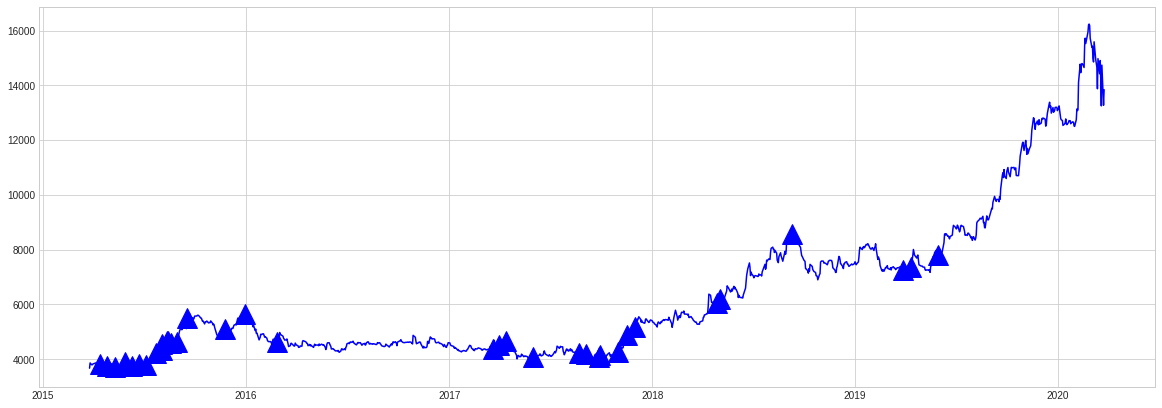

In [23]:
plt.plot(wf.index, wf["Adj Close"], '-^', markersize=20, color='b', markevery=markers_on)
#plt.plot(wf.index, wf["Adj Close"], 'v', markersize=20, color='g', markevery=100)
plt.show()

## Objective 4 : Trading strategy 

1. Swing trading (squaring off position within 3 months)
2. Entry position needs to be taken with some logic.
3. Stop Loss will be based on Risk Tolerance.
4. Provisioned dynamic Stop Loss.
5. Expectation is Profit Exit
6. Entry will be at the Open Price
7. Exit will be at the Close Price


In [0]:
def get_random_subset_series(ticker, days=90):
  wf = df.loc[:, [('Open', ticker),('High', ticker), ('Low', ticker), ('Close', ticker), ('Volume', ticker)]]
  wf.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
  wf.dropna(inplace=True)
  data_size = wf.shape[0]
  from_date = wf.index.tolist()[random.randint(0,data_size-days-1)]
  to_date = from_date + timedelta(days=days)
  return wf[(wf.index >= from_date) & (wf.index < to_date)]

def profit_exit(entry_price, expected_profit, entry_type="LONG"):
  variation = entry_price * expected_profit/100
  target_price = entry_price + variation if entry_type=="LONG" else current_price - variation
  return target_price

def variable_dynamic_stop_loss(entry_price, current_price, \
                               risk_tolerance, \
                               loss_decrement_per_unit_profit, \
                               entry_type="LONG"):
  '''
  This function will be called once the entry position had been taken on the \
  security.
  This will be repeateadily called to adjust the stop loss for the trade.

  entry_price: Price at which the stock position is taken
  current_price: Current Price of the stock
  risk_tolerance: max % decrement that can be tolerated from the investor
  loss_decrement_per_unit_profit: how much unit to reduce the stop-loss value 
  for each unit increase in the profit.
  entry_type: LONG or SHORT  
  '''

  variation = risk_tolerance*entry_price/100
  stop_loss = entry_price - variation if entry_type=="LONG" else entry_price + variation

  if current_price < entry_price:
    return stop_loss
  
  variation = risk_tolerance*current_price/100
  stop_loss = current_price - variation if entry_type=="LONG" else current_price + variation

  unrealized_profit = current_price - entry_price
  variation = unrealized_profit * loss_decrement_per_unit_profit
  stop_loss = stop_loss + variation if entry_type=="LONG" else stop_loss - variation

  return stop_loss

In [35]:
wf = get_random_subset_series("ABBOTINDIA.NS", days=90)
wf

Open         High          Low        Close  Volume
Date                                                                  
2017-11-15  5009.000000  5050.000000  4885.000000  4981.700195   20124
2017-11-16  5025.000000  5039.000000  4844.000000  4866.000000    6193
2017-11-17  4945.000000  4971.950195  4810.049805  4948.200195   11370
2017-11-20  4948.200195  5010.000000  4928.049805  4944.850098    6562
2017-11-21  4945.000000  5007.950195  4945.000000  4990.850098    4891
...                 ...          ...          ...          ...     ...
2018-02-06  5342.000000  5363.000000  5239.250000  5250.750000    3827
2018-02-07  5298.000000  5378.049805  5261.000000  5355.149902    2606
2018-02-08  5349.799805  5507.350098  5349.799805  5463.250000    1650
2018-02-09  5730.000000  5730.000000  5310.000000  5604.549805    3393
2018-02-12  5650.000000  6159.000000  5520.100098  5886.250000   14611

[62 rows x 5 columns]

Entry Price: 5009.0
Target: 6010.8
Initial Stop loss: 4758.55

Loss Booked at 5355.00
Profit: 422.2001953125
         Date         Open        Close  ...  Volume  State   Resistance
0  2017-11-15  5009.000000  4981.700195  ...   20124      1  4758.550000
1  2017-11-16  5025.000000  4866.000000  ...    6193      0  4758.550000
2  2017-11-17  4945.000000  4948.200195  ...   11370      0  4758.550000
3  2017-11-20  4948.200195  4944.850098  ...    6562      0  4758.550000
4  2017-11-21  4945.000000  4990.850098  ...    4891      0  4758.550000
5  2017-11-22  5049.000000  4956.350098  ...    4465      0  4758.550000
6  2017-11-23  4990.000000  4858.700195  ...    4900      0  4758.550000
7  2017-11-24  4875.049805  4977.500000  ...    5867      0  4758.550000
8  2017-11-27  4990.000000  5046.899902  ...    5772      0  4802.134888
9  2017-11-28  5050.000000  5049.350098  ...    2789      0  4804.952612
10 2017-11-29  5099.799805  5078.500000  ...    2309      0  4838.475000
11 2017-11-30  

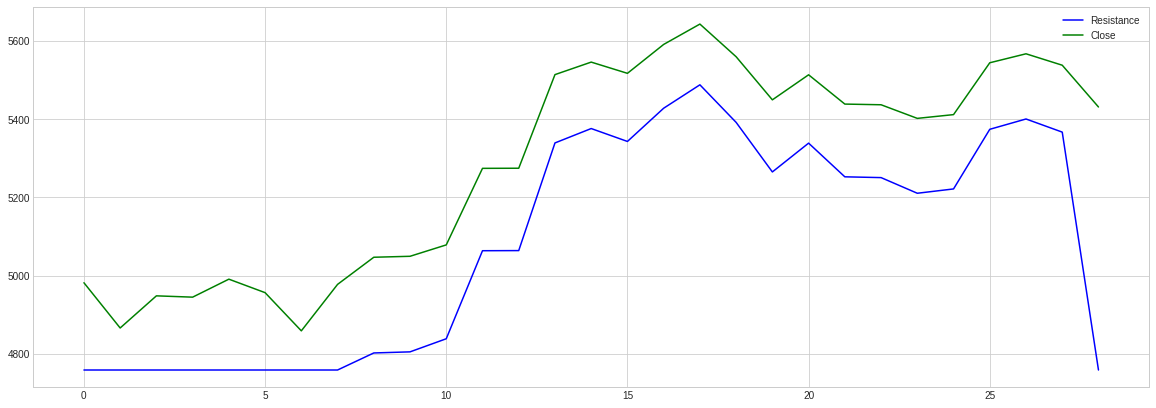

In [70]:
pd.set_option('display.max_rows', None)

entry_price = wf.iloc[0,0]
risk_tolerance = 5
expected_returns = 20
loss_decrement_per_unit_profit = 0.2
target = profit_exit(entry_price, expected_returns)
resistance = variable_dynamic_stop_loss(entry_price, entry_price, risk_tolerance, loss_decrement_per_unit_profit)

print(f"Entry Price: {entry_price}\nTarget: {target}\nInitial Stop loss: {resistance}")

trading_df = wf.loc[:, ["Open", "Close", "High", "Low", "Volume"]]
trading_df.loc[:, "State"] = 0
trading_df.loc[:, "Resistance"] = resistance
trading_df.iloc[0,5] = 1
sold = False
for row_index, row_val in trading_df.iloc[1:,:4].iterrows():
  if row_val.High >= target:
    print(f"\nProfit Booked at {row_val.High:.2f}")
    trading_df.loc[row_index, "State"] = -1
    sold = True
    break
  elif row_val.Low <= resistance:
    print(f"\nLoss Booked at {row_val.Low:.2f}")
    trading_df.loc[row_index, "State"] = -1
    sold = True
    break
  resistance = variable_dynamic_stop_loss(entry_price, row_val.Close, risk_tolerance, loss_decrement_per_unit_profit)
  trading_df.loc[row_index, "Resistance"] = resistance

if not sold:
  trading_df.iloc[-1, -2] = -1

exit_price = trading_df[trading_df["State"]==-1].iloc[0,1]
profit = exit_price - entry_price
print(f"Profit: {profit}")


trading_df = trading_df.reset_index()
till = trading_df.index[trading_df["State"]==-1][0]+1
print(trading_df.iloc[:till, :])
plt.plot(trading_df.iloc[:till, -1], color= 'b', label="Resistance")
plt.plot(trading_df.iloc[:till, 2], color='g', label="Close")
plt.legend()
plt.show()

## Objective 4: Reinforcement Learning for Trading Strategy


In [0]:
df= df_full.copy()
name = 'Actor-critic agent'

class Actor:
    def __init__(self, name, input_size, output_size, size_layer):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            feed_actor = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_actor, output_size)

class Critic:
    def __init__(self, name, input_size, output_size, size_layer, learning_rate):
        with tf.variable_scope(name):
            self.X = tf.placeholder(tf.float32, (None, input_size))
            self.Y = tf.placeholder(tf.float32, (None, output_size))
            self.REWARD = tf.placeholder(tf.float32, (None, 1))
            feed_critic = tf.layers.dense(self.X, size_layer, activation = tf.nn.relu)
            feed_critic = tf.layers.dense(feed_critic, output_size, activation = tf.nn.relu) + self.Y
            feed_critic = tf.layers.dense(feed_critic, size_layer//2, activation = tf.nn.relu)
            self.logits = tf.layers.dense(feed_critic, 1)
            self.cost = tf.reduce_mean(tf.square(self.REWARD - self.logits))
            self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)
            
class Agent:

    LEARNING_RATE = 0.001
    BATCH_SIZE = 32
    LAYER_SIZE = 256
    OUTPUT_SIZE = 3
    EPSILON = 0.5
    DECAY_RATE = 0.005
    MIN_EPSILON = 0.1
    GAMMA = 0.99
    MEMORIES = deque()
    MEMORY_SIZE = 300
    COPY = 1000
    T_COPY = 0

    def __init__(self, state_size, window_size, trend, skip):
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        tf.reset_default_graph()
        self.actor = Actor('actor-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.actor_target = Actor('actor-target', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE)
        self.critic = Critic('critic-original', self.state_size, self.OUTPUT_SIZE, self.LAYER_SIZE, self.LEARNING_RATE)
        self.critic_target = Critic('critic-target', self.state_size, self.OUTPUT_SIZE, 
                                    self.LAYER_SIZE, self.LEARNING_RATE)
        self.grad_critic = tf.gradients(self.critic.logits, self.critic.Y)
        self.actor_critic_grad = tf.placeholder(tf.float32, [None, self.OUTPUT_SIZE])
        weights_actor = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='actor')
        self.grad_actor = tf.gradients(self.actor.logits, weights_actor, -self.actor_critic_grad)
        grads = zip(self.grad_actor, weights_actor)
        self.optimizer = tf.train.AdamOptimizer(self.LEARNING_RATE).apply_gradients(grads)
        self.sess = tf.InteractiveSession()
        self.sess.run(tf.global_variables_initializer())
    
    def _assign(self, from_name, to_name):
        from_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=from_name)
        to_w = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=to_name)
        for i in range(len(from_w)):
            assign_op = to_w[i].assign(from_w[i])
            self.sess.run(assign_op)
            
    def _memorize(self, state, action, reward, new_state, dead):
        self.MEMORIES.append((state, action, reward, new_state, dead))
        if len(self.MEMORIES) > self.MEMORY_SIZE:
            self.MEMORIES.popleft()
            
    def _select_action(self, state):
        if np.random.rand() < self.EPSILON:
            action = np.random.randint(self.OUTPUT_SIZE)
        else:
            prediction = self.sess.run(self.actor.logits, feed_dict={self.actor.X:[state]})[0]
            action = np.argmax(prediction)
        return action
    
    def _construct_memories_and_train(self, replay):
        states = np.array([a[0] for a in replay])
        new_states = np.array([a[3] for a in replay])
        Q = self.sess.run(self.actor.logits, feed_dict={self.actor.X: states})
        Q_target = self.sess.run(self.actor_target.logits, feed_dict={self.actor_target.X: states})
        grads = self.sess.run(self.grad_critic, feed_dict={self.critic.X:states, self.critic.Y:Q})[0]
        self.sess.run(self.optimizer, feed_dict={self.actor.X:states, self.actor_critic_grad:grads})
        
        rewards = np.array([a[2] for a in replay]).reshape((-1, 1))
        rewards_target = self.sess.run(self.critic_target.logits, 
                                       feed_dict={self.critic_target.X:new_states,self.critic_target.Y:Q_target})
        for i in range(len(replay)):
            if not replay[0][-1]:
                rewards[i] += self.GAMMA * rewards_target[i]
        cost, _ = self.sess.run([self.critic.cost, self.critic.optimizer], 
                                feed_dict={self.critic.X:states, self.critic.Y:Q, self.critic.REWARD:rewards})
        return cost
    
    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array(res)
    
    def buy(self, initial_money):
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        state = self.get_state(0)
        for t in range(0, len(self.trend) - 1, self.skip):
            action = self._select_action(state)
            next_state = self.get_state(t + 1)
            
            if action == 1 and initial_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))
            
            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((close[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, close[t], invest, initial_money)
                )
            
            state = next_state
        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest
    
    def train(self, iterations, checkpoint, initial_money):
        for i in range(iterations):
            total_profit = 0
            inventory = []
            state = self.get_state(0)
            starting_money = initial_money
            for t in range(0, len(self.trend) - 1, self.skip):
                if (self.T_COPY + 1) % self.COPY == 0:
                    self._assign('actor-original', 'actor-target')
                    self._assign('critic-original', 'critic-target')
                
                action = self._select_action(state)
                next_state = self.get_state(t + 1)
                
                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]
                
                elif action == 2 and len(inventory) > 0:
                    bought_price = inventory.pop(0)
                    total_profit += self.trend[t] - bought_price
                    starting_money += self.trend[t]
                    
                invest = ((starting_money - initial_money) / initial_money)
                
                self._memorize(state, action, invest, next_state, starting_money < initial_money)
                state = next_state
                batch_size = min(len(self.MEMORIES), self.BATCH_SIZE)
                replay = random.sample(self.MEMORIES, batch_size)
                cost = self._construct_memories_and_train(replay)
                self.T_COPY += 1
                self.EPSILON = self.MIN_EPSILON + (1.0 - self.MIN_EPSILON) * np.exp(-self.DECAY_RATE * i)
            if (i+1) % checkpoint == 0:
                print('epoch: %d, total rewards: %f.3, cost: %f, total money: %f'%(i + 1, total_profit, cost,
                                                                                  starting_money))

### Trading Strategy Parameterized Rules Function



In [0]:
def profit_exit(entry_price, expected_profit, entry_type="LONG"):
  variation = entry_price * expected_profit/100
  target_price = entry_price + variation if entry_type=="LONG" else current_price - variation
  return target_price

def variable_dynamic_stop_loss(entry_price, current_price, \
                               risk_tolerance, \
                               loss_decrement_per_unit_profit, \
                               entry_type="LONG"):
  '''
  This function will be called once the entry position had been taken on the \
  security.
  This will be repeateadily called to adjust the stop loss for the trade.

  entry_price: Price at which the stock position is taken
  current_price: Current Price of the stock
  risk_tolerance: max % decrement that can be tolerated from the investor
  loss_decrement_per_unit_profit: how much unit to reduce the stop-loss value 
  for each unit increase in the profit.
  entry_type: LONG or SHORT  
  '''

  variation = risk_tolerance*entry_price/100
  stop_loss = entry_price - variation if entry_type=="LONG" else entry_price + variation

  if current_price < entry_price:
    return stop_loss
  
  variation = risk_tolerance*current_price/100
  stop_loss = current_price - variation if entry_type=="LONG" else current_price + variation

  unrealized_profit = current_price - entry_price
  variation = unrealized_profit * loss_decrement_per_unit_profit
  stop_loss = stop_loss + variation if entry_type=="LONG" else stop_loss - variation

  return stop_loss

In [0]:
entry_price = 13000
stop_loss = df[('Adj Close',  'ABBOTINDIA.NS')].apply(lambda x: variable_dynamic_stop_loss(entry_price, x, 5, 0.1)).shift()

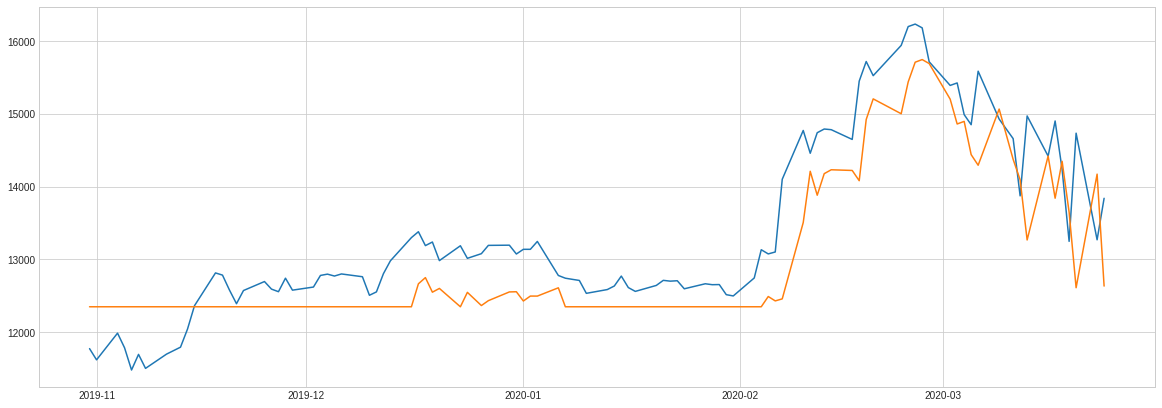

In [0]:
plt.rcParams["figure.figsize"] = (20,7)
plt.plot(df[('Adj Close',  'ABBOTINDIA.NS')].iloc[-100:])
plt.plot(stop_loss.iloc[-100:])

### Experimentation | Pair Trading Strategy

In [0]:
start_date = '2007/12/01'
end_date = '2020/12/01'
cachedFolderName = 'Data/'
dataSetID = 'StockUniverse_Q1_2020'
instrumentIDs = ["ABBOTINDIA.NS", "HONAUT.NS", "LALPATHLAB.NS",
                    "HEXAWARE.NS", "NIITTECH.NS", "SANOFI.NS",
                    "AJANTPHARM.NS", "APLLTD.NS", "SYMPHONY.NS",
                    "GODREJAGRO.NS", "GUJGASLTD.NS", "ALKEM.NS", 
                    "SIS.NS", "HATSUN.NS", "GODREJIND.NS",
                    "PHOENIXLTD.NS", "ITI.NS", "INDIGO.NS"]
ds = YahooStockDataSource(cachedFolderName=cachedFolderName,
                            dataSetId=dataSetID,
                            instrumentIds=instrumentIDs,
                            startDateStr=start_date,
                            endDateStr=end_date,
                            event='history')

df = ds.getBookDataByFeature()['adjClose'].dropna()

Processing data for stock: ABBOTINDIA.NS
Processing data for stock: HONAUT.NS
Processing data for stock: LALPATHLAB.NS
Processing data for stock: HEXAWARE.NS
Processing data for stock: NIITTECH.NS
Processing data for stock: SANOFI.NS
Processing data for stock: AJANTPHARM.NS
Processing data for stock: APLLTD.NS
Processing data for stock: SYMPHONY.NS
Processing data for stock: GODREJAGRO.NS
Processing data for stock: GUJGASLTD.NS
Processing data for stock: ALKEM.NS
Processing data for stock: SIS.NS
Processing data for stock: HATSUN.NS
Processing data for stock: GODREJIND.NS
Processing data for stock: PHOENIXLTD.NS
Processing data for stock: ITI.NS
Processing data for stock: INDIGO.NS
20% done...
40% done...
60% done...
80% done...


In [0]:
df

ABBOTINDIA.NS     HONAUT.NS  ...      ITI.NS    INDIGO.NS
2017-10-16    4230.456055  15622.759766  ...  151.100006  1110.693481
2017-10-17    4156.110840  15529.793945  ...  148.949997  1098.907837
2017-10-18    4097.981445  15633.720703  ...  146.399994  1138.127930
2017-10-19    4161.761719  15779.796875  ...  144.600006  1147.734863
2017-10-23    4078.178467  15600.540039  ...  149.500000  1148.477661
...                   ...           ...  ...         ...          ...
2020-03-27   14146.099609  24907.099609  ...   54.349998  1027.300049
2020-03-30   15210.500000  24003.800781  ...   57.250000  1016.700012
2020-03-31   15451.099609  25890.599609  ...   62.750000  1066.150024
2020-04-01   15613.599609  25447.699219  ...   59.450001   999.000000
2020-04-03   15810.500000  24599.050781  ...   60.200001   953.250000

[606 rows x 18 columns]

In [0]:
import statsmodels
from statsmodels.tsa.stattools import coint
import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,7)

In [0]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

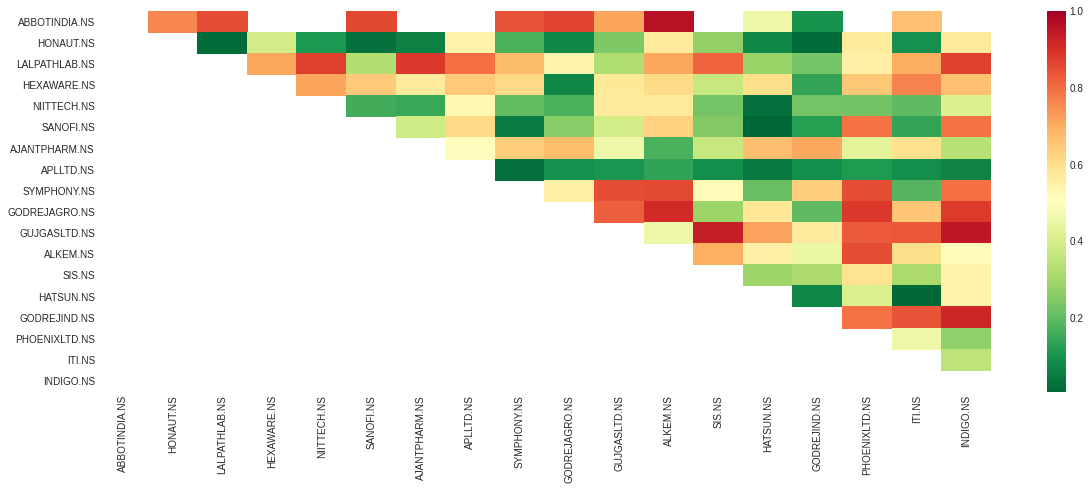

[('HONAUT.NS', 'LALPATHLAB.NS'), ('HONAUT.NS', 'GODREJIND.NS'), ('SANOFI.NS', 'HATSUN.NS'), ('HATSUN.NS', 'ITI.NS')]


In [0]:
scores, pvalues, pairs = find_cointegrated_pairs(df)

m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=instrumentIDs, 
                yticklabels=instrumentIDs, cmap='RdYlGn_r', 
                mask = (pvalues >= 0.98))
plt.show()
print(pairs)

From the above cointegration test result, we found we have following 4 pairs are cointigrated:
1. ('HONAUT.NS', 'LALPATHLAB.NS'), 
2. ('HONAUT.NS', 'GODREJIND.NS'),
3. ('SANOFI.NS', 'HATSUN.NS'), 
4. ('HATSUN.NS', 'ITI.NS')

Lets pick the case of ('HONAUT.NS', 'LALPATHLAB.NS')

ERROR! Session/line number was not unique in database. History logging moved to new session 62


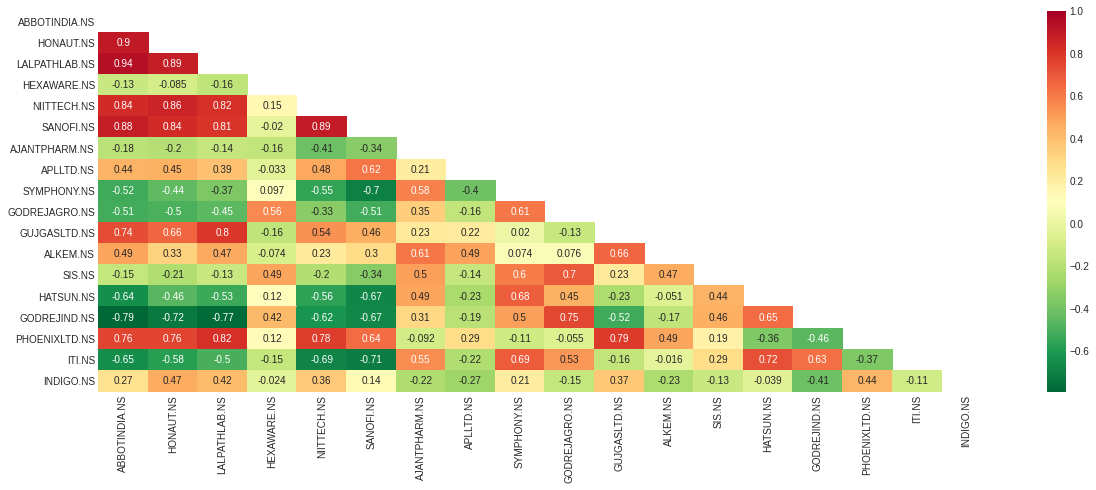

In [0]:
corr = df.corr()
seaborn.heatmap(corr, xticklabels=instrumentIDs, 
                yticklabels=instrumentIDs, cmap='RdYlGn_r', annot=True,
                mask = np.triu(np.ones_like(corr, dtype=np.bool)))

-3.7482765505684843 0.015864990912240633


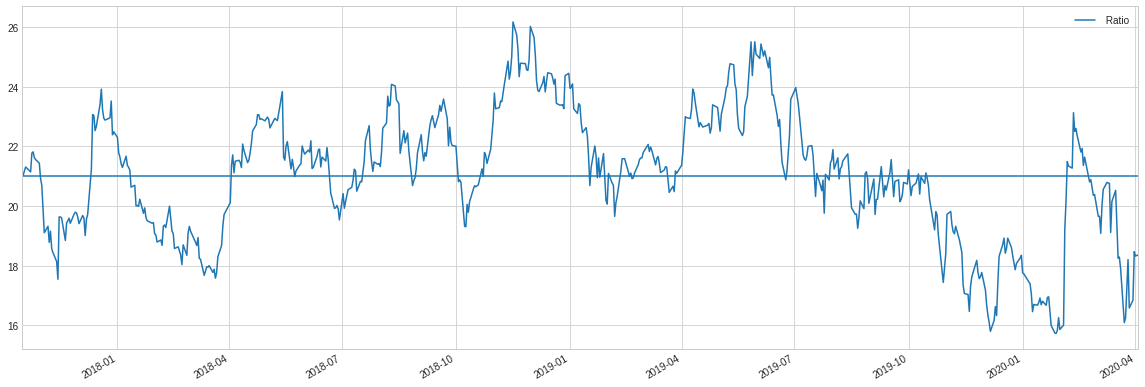

In [0]:
S1 = df['HONAUT.NS']
S2 = df['LALPATHLAB.NS']
score, pvalue, _ = coint(S1, S2)
print(score, pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend([' Ratio'])
plt.show()

The ratio does look like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a z-score. Z score is defined as:

    Z Score (Value) = (Value — Mean) / Standard Deviation

In [0]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

ERROR! Session/line number was not unique in database. History logging moved to new session 64


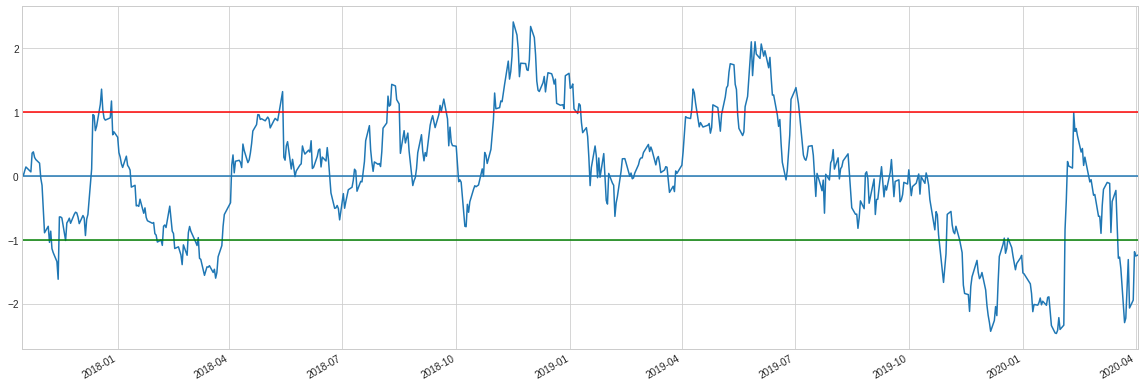

In [0]:
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

Here we are trying to create a signal that tells us if the ratio is a buy or a sell at the next instant in time, i.e our prediction variable Y:

    Y = Ratio is buy (1) or sell (-1)

    Y(t)= Sign( Ratio(t+1) — Ratio(t) )

Note we don’t need to predict actual stock prices, or even actual value of ratio (though we could), just the direction of next move in ratio

In [0]:
print(len(ratios))
train = ratios[:424]
test = ratios[424:]

606


What could relevant features be? We want to predict the direction of ratio move. We’ve seen that our two securities are cointegrated so the ratio tends to move around and revert back to the mean. It seems our features should be certain measures for the mean of the ratio, the divergence of the current value from the mean to be able to generate our trading signal.

Let’s use the following features:

    60 day Moving Average of Ratio: Measure of rolling mean
    5 day Moving Average of Ratio: Measure of current value of mean
    60 day Standard Deviation
    z score: (5d MA — 60d MA) /60d SD

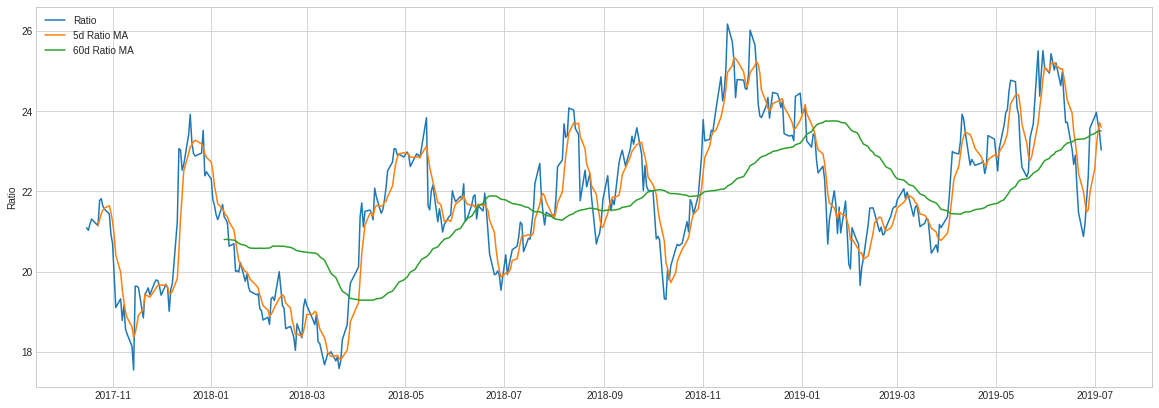

In [0]:
ratios_mavg5 = train.rolling(window=5,center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60

plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Ratio')
plt.show()

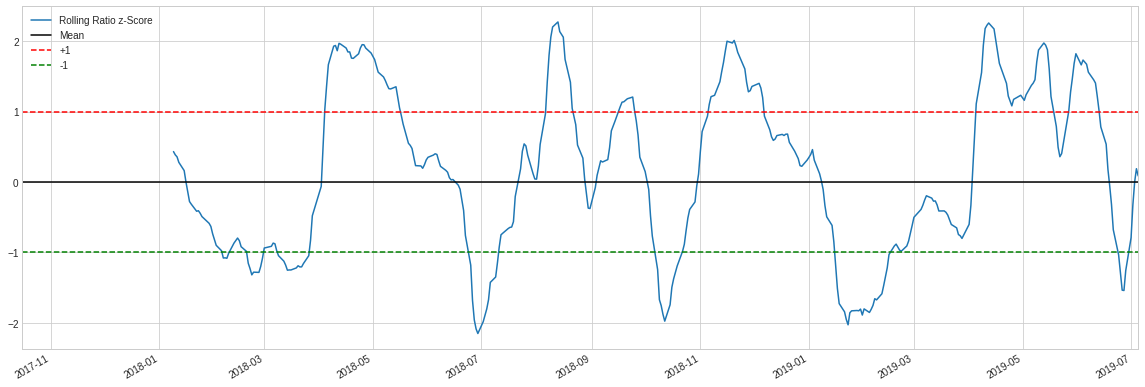

In [0]:
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

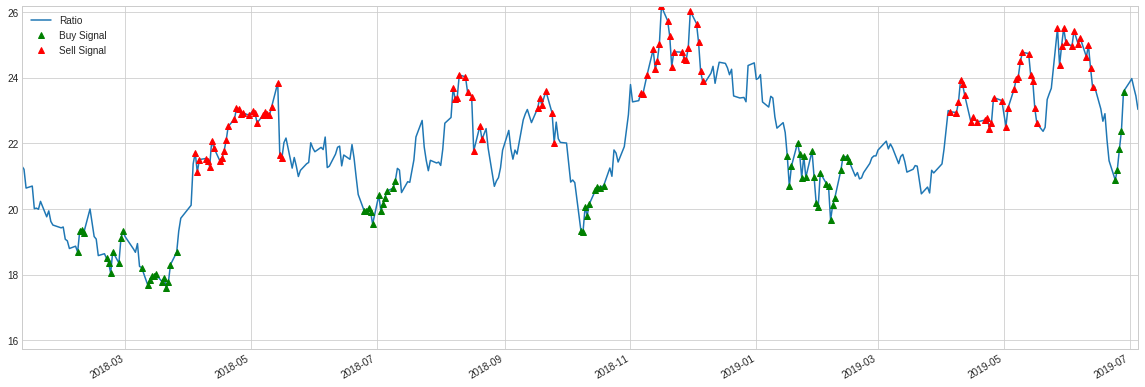

In [0]:
# train
train[60:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[60:].plot(color='g', linestyle='None', marker='^')
sell[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

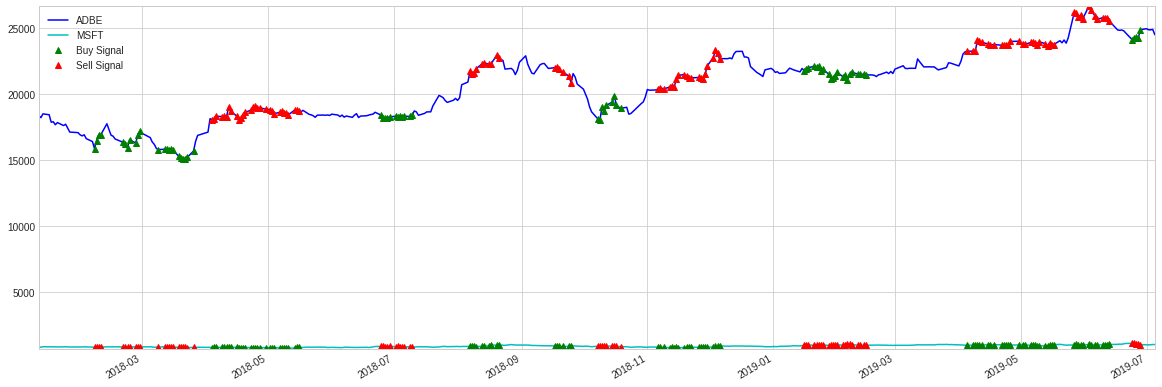

In [0]:
# Plot the prices and buy and sell signals from z score

S1 = df['HONAUT.NS'].iloc[:424]
S2 = df['LALPATHLAB.NS'].iloc[:424]
S1[60:].plot(color='b')
S2[60:].plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]
buyR[60:].plot(color='g', linestyle='None', marker='^')
sellR[60:].plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['ADBE','MSFT', 'Buy Signal', 'Sell Signal'])
plt.show()

In [0]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
    return money

trade(df['HONAUT.NS'].iloc[:424], df['LALPATHLAB.NS'].iloc[:424], 5, 60)

Exit pos 0.0 21.363701579106962 0 0
Exit pos 0.0 21.299811585719244 0 0
Exit pos 0.0 21.205211632740912 0 0
Exit pos 0.0 20.63417487137202 0 0
Exit pos 0.0 20.695195585112945 0 0
Exit pos 0.0 20.005371960650574 0 0
Exit pos 0.0 20.02306203570181 0 0
Exit pos 0.0 19.988753620515865 0 0
Exit pos 0.0 20.229132544588424 0 0
Exit pos 0.0 19.75839470929239 0 0
Exit pos 0.0 19.93887455438619 0 0
Exit pos 0.0 19.617910161688183 0 0
Exit pos 0.0 19.50752390259363 0 0
Exit pos 0.0 19.422411184511198 0 0
Exit pos 0.0 19.448166088122097 0 0
Exit pos 0.0 19.074631811566828 0 0
Buying Ratio 1.8189894035458565e-12 18.68206109816189 1 -18.68206109816189
Buying Ratio 1.8189894035458565e-12 19.324211957974516 2 -38.00627305613641
Buying Ratio 1.8189894035458565e-12 19.36553853896753 3 -57.371811595103935
Buying Ratio 1.8189894035458565e-12 19.27950883350893 4 -76.65132042861286
Buying Ratio 3.637978807091713e-12 18.49379859678595 5 -95.14511902539881
Buying Ratio 1.8189894035458565e-12 18.36235342066276

175877.13656372947

In [0]:
trade(df['HONAUT.NS'].iloc[424:], df['LALPATHLAB.NS'].iloc[424:], 5, 60)

Exit pos 0.0 20.653695175963367 0 0
Exit pos 0.0 20.76637910949088 0 0
Exit pos 0.0 21.07443249639407 0 0
Exit pos 0.0 20.400089336221757 0 0
Exit pos 0.0 20.97820572321756 0 0
Exit pos 0.0 20.761447303434622 0 0
Exit pos 0.0 21.10974149602524 0 0
Exit pos 0.0 20.93912824699598 0 0
Exit pos 0.0 20.699972867536957 0 0
Exit pos 0.0 20.21189160264978 0 0
Exit pos 0.0 19.202643338734728 0 0
Buying Ratio 0.0 19.70650046909512 1 -19.70650046909512
Buying Ratio -3.637978807091713e-12 19.035750799038087 2 -38.7422512681332
Buying Ratio 0.0 17.44151149784285 3 -56.183762765976056
Buying Ratio 0.0 17.916211363228076 4 -74.09997412920413
Buying Ratio -3.637978807091713e-12 18.3969278242691 5 -92.49690195347323
Buying Ratio -3.637978807091713e-12 19.72109415372274 6 -112.21799610719597
Buying Ratio 0.0 19.820959913513494 7 -132.03895602070946
Buying Ratio 0.0 19.3660603422436 8 -151.40501636295306
Buying Ratio 0.0 19.138840923789306 9 -170.54385728674237
Buying Ratio 0.0 19.07236559861694 10 -189.

170651.87159866426

In [0]:
length_scores = [trade(df['HONAUT.NS'].iloc[:424], df['LALPATHLAB.NS'].iloc[:424], l, 5) for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Streaming output truncated to the last 5000 lines.
Buying Ratio -304742.83465648966 24.080777775326165 23 -538.0154255851617
Buying Ratio -304742.83465648966 23.90668987934089 24 -561.9221154645026
Buying Ratio -304742.83465648966 23.06033608951628 25 -584.9824515540188
Buying Ratio -304742.83465648966 22.602588033077495 26 -607.5850395870963
Buying Ratio -304742.83465648966 22.36286533108011 27 -629.9479049181764
Buying Ratio -304742.83465648966 23.331356373896128 28 -653.2792612920725
Buying Ratio -304742.83465648966 23.50961482417564 29 -676.7888761162482
Buying Ratio -304742.83465648966 23.673310982328978 30 -700.4621870985771
Buying Ratio -304742.83465648966 25.503326693649246 31 -725.9655137922264
Buying Ratio -304742.83465648966 24.37128827632268 32 -750.3368020685491
Buying Ratio -304742.83465648966 24.976103408562935 33 -775.312905477112
Buying Ratio -304742.83465648966 25.506717778699777 34 -800.8196232558118
Buying Ratio -304742.83465648966 25.093753102239457 35 -825.9133763

In [0]:
length_scores2 = [trade(df['HONAUT.NS'].iloc[424:], df['LALPATHLAB.NS'].iloc[424:],l,5) for l in range(255)]
print (best_length, 'day window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'day window:', length_scores2[best_length2])

Streaming output truncated to the last 5000 lines.
Selling Ratio 3.2741809263825417e-11 16.91870506735835 -48 843.8534776696013
Selling Ratio 3.2741809263825417e-11 16.690794017081092 -49 860.5442716866824
Selling Ratio 3.2741809263825417e-11 16.811859816618636 -50 877.356131503301
Selling Ratio 3.2741809263825417e-11 16.675137701618358 -51 894.0312692049193
Selling Ratio 3.2741809263825417e-11 16.94082770762726 -52 910.9720969125466
Selling Ratio 2.9103830456733704e-11 16.958059802291526 -53 927.9301567148381
Selling Ratio 2.9103830456733704e-11 16.4922861301179 -54 944.422442844956
Selling Ratio 2.9103830456733704e-11 15.996155706977335 -55 960.4185985519333
Selling Ratio 2.9103830456733704e-11 15.745267881073767 -56 976.1638664330071
Selling Ratio 2.9103830456733704e-11 15.729160554423943 -57 991.8930269874311
Selling Ratio 2.9103830456733704e-11 15.834370510063426 -58 1007.7273974974945
Selling Ratio 3.2741809263825417e-11 16.26144314063836 -59 1023.9888406381328
Selling Ratio 3.27

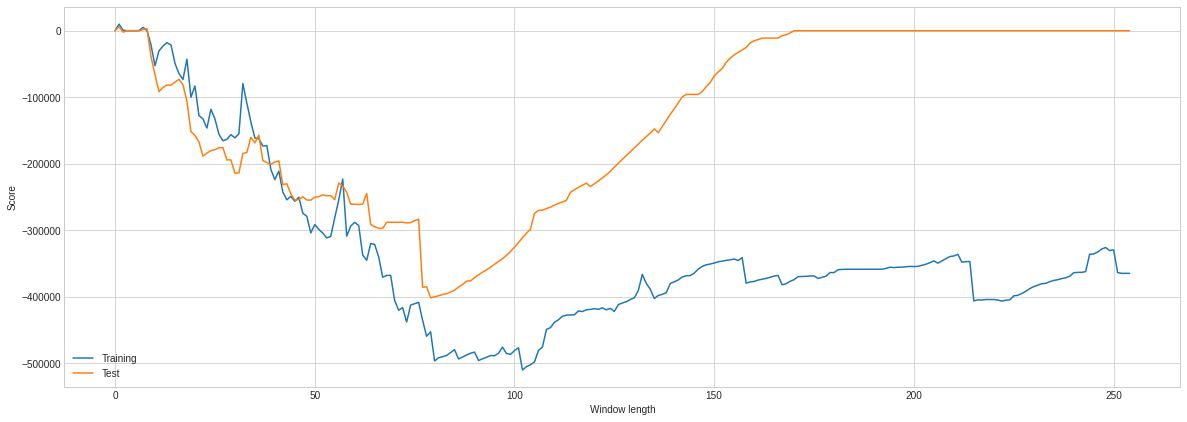

In [0]:
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.show()

### Experimentation | Backtesting with the Auquan Toolbox


In [0]:
# This is specifically required to use auquan_toolbox.
# The toolbox had got issues with pandas>=1.0.0 so need to install 
# pandas==0.25.3, the latest working pandas for auquan_toolbox

# Run this cell only if the functionalities of this toolbox is required
%pip install pandas==0.24.1
%pip install tensorboardX
%pip install bs4
%pip install -U auquan_toolbox

In [0]:
from backtester.trading_system_parameters import TradingSystemParameters
from backtester.features.feature import Feature
from backtester.dataSource.yahoo_data_source import YahooStockDataSource
from backtester.timeRule.custom_time_rule import CustomTimeRule
from backtester.executionSystem.simple_execution_system import SimpleExecutionSystem
from backtester.orderPlacer.backtesting_order_placer import BacktestingOrderPlacer
from backtester.trading_system import TradingSystem
from backtester.constants import *
from datetime import timedelta

In [0]:
def hurst_f(input_ts, lags_to_test=20):  
  # interpretation of return value
  # hurst < 0.5 - input_ts is mean reverting
  # hurst = 0.5 - input_ts is effectively random/geometric brownian motion
  # hurst > 0.5 - input_ts is trending
  tau = []
  lagvec = []  
  #  Step through the different lags  
  for lag in range(2, lags_to_test):  
      #  produce price difference with lag  
      pp = np.subtract(input_ts[lag:], input_ts[:-lag])  
      #  Write the different lags into a vector  
      lagvec.append(lag)  
      #  Calculate the variance of the differnce vector  
      tau.append(np.sqrt(np.std(pp)))  
  #  linear fit to double-log graph (gives power)  
  m = np.polyfit(np.log10(lagvec), np.log10(tau), 1)  
  # calculate hurst  
  hurst = m[0]*2

  return hurst 

In [0]:
from backtester.features.feature import Feature
import backtester.constants

import pandas as pd
import numpy as np

class TradingFunctions():

    def __init__(self):
        self.count = 0
        self.params = {}

    def getSymbolsToTrade(self):
        return ['AAPL']

    def getCachedFolderName(self):
        return 'Data/'

    def getDataSetID(self):
        return 'equity_data'
    
    def getStartDate(self):
        return '2015/01/02'
    
    def getEndDate(self):
        return '2017/08/31'

    def getInstrumentFeatureConfigDicts(self):
        ma1Dict = {
            'featureKey': 'ma_90',
            'featureId': 'moving_average',
            'params': {
                'period': 90,
                'featureName': 'adjClose'
            }
        }
        mom30Dict = {
            'featureKey': 'mom_30',
            'featureId': 'momentum',
            'params': {
                'period': 30,
                'featureName': 'adjClose'
            }
        }
        mom10Dict = {
            'featureKey': 'mom_10',
            'featureId': 'momentum',
            'params': {
                'period': 10,
                'featureName': 'adjClose'
            }
        }
        
        return [ma1Dict, mom10Dict, mom30Dict]

    def getPrediction(self, time, updateNum, instrumentManager, predictions):
        self.updateCount()
        
        lookbackInstrumentFeatures = instrumentManager.getLookbackInstrumentFeatures()

        mom30Data = lookbackInstrumentFeatures.getFeatureDf('mom_30')
        ma90Data = lookbackInstrumentFeatures.getFeatureDf('ma_90')

        if len(ma90Data.index) > 20:
            mom30 = mom30Data.iloc[-1]
            # Go long if momentum is positive
            predictions[mom30 > 0] = 1
            # Go short if momentum is negative
            predictions[mom30 <= 0] = 0          
        else:
            # If no sufficient data then don't take any positions
            predictions.values[:] = 0.5
        return predictions

    def updateCount(self):
        self.count = self.count + 1

In [0]:
class TradingParams(TradingSystemParameters):

    def __init__(self, tradingFunctions):
        self.__tradingFunctions = tradingFunctions
        super(TradingParams, self).__init__()
        self.__dataSetId = self.__tradingFunctions.getDataSetID()
        self.__instrumentIds = self.__tradingFunctions.getSymbolsToTrade()
        self.__startDate = self.__tradingFunctions.getStartDate()
        self.__endDate = self.__tradingFunctions.getEndDate()
        self.__cachedFolderName = self.__tradingFunctions.getCachedFolderName()

    def getDataParser(self):
        return YahooStockDataSource(
            cachedFolderName = self.__cachedFolderName,
            dataSetId = self.__dataSetId,
            instrumentIds = self.__instrumentIds,
            startDateStr = self.__startDate,
            endDateStr = self.__endDate,
        )
        
    def getTimeRuleForUpdates(self):
        return CustomTimeRule(
            startDate = self.__startDate, 
            endDate = self.__endDate, 
            frequency = 'D', 
            sample = '30'
        )

    def getFrequencyOfFeatureUpdates(self):
        return timedelta(days = 1)

    def getStartingCapital(self):
        if len(self.__tradingFunctions.getSymbolsToTrade()) > 0:
            return 10000*len(self.__tradingFunctions.getSymbolsToTrade())
        else:
            return 30000

    def getCustomFeatures(self):
        #from TradingFeatures import MyCustomFeature, TrainingPredictionFeature, FeesCalculator, BuyHoldPnL, ScoreFeature
        return {
            'my_custom_feature': MyCustomFeature,
            'prediction': TrainingPredictionFeature,
            'zero_fees': FeesCalculator,
            'benchmark_PnL': BuyHoldPnL,
            'score': ScoreFeature
        }

    def getInstrumentFeatureConfigDicts(self):
        predictionDict = {
            'featureKey': 'prediction',
            'featureId': 'prediction',
            'params': {}
        }
        feesConfigDict = {
            'featureKey': 'fees',
            'featureId': 'zero_fees',
            'params': {}
        }
        profitlossConfigDict = {
            'featureKey': 'pnl',
            'featureId': 'pnl',
            'params': {
                'price': self.getPriceFeatureKey(),
                'fees': 'fees'
            }
        }
        capitalConfigDict = {
            'featureKey': 'capital',
            'featureId': 'capital',
            'params': {
                'price': 'adjClose',
                'fees': 'fees',
                'capitalReqPercent': 0.95
            }
        }
        benchmarkDict = {
            'featureKey': 'benchmark',
            'featureId': 'benchmark_PnL',
            'params': {'pnlKey': 'pnl'}
        }
        scoreDict = {
            'featureKey': 'score',
            'featureId': 'score',
            'params': {
                'featureName1': 'pnl',
                'featureName2':'benchmark'
            }
        }

        stockFeatureConfigs = self.__tradingFunctions.getInstrumentFeatureConfigDicts()

        return {
            INSTRUMENT_TYPE_STOCK: stockFeatureConfigs + [
                predictionDict,
                feesConfigDict,
                profitlossConfigDict,
                capitalConfigDict,
                benchmarkDict, 
                scoreDict
            ]
        }

    def getMarketFeatureConfigDicts(self):
        scoreDict = {
            'featureKey': 'score',
            'featureId': 'score_ll',
            'params': {
                'featureName': self.getPriceFeatureKey(),
                'instrument_score_feature': 'score'
            }
        }
        
        return [scoreDict]

    def getPrediction(self, time, updateNum, instrumentManager):
        predictions = pd.Series(index = self.__instrumentIds)
        predictions = self.__tradingFunctions.getPrediction(time, updateNum, instrumentManager, predictions)
        
        return predictions

    def getExecutionSystem(self):
        return SimpleExecutionSystem(
            enter_threshold = 0.7,
            exit_threshold = 0.55,
            longLimit = 1,
            shortLimit = 1,
            capitalUsageLimit = 0.10*self.getStartingCapital(),
            enterlotSize = 1, 
            exitlotSize = 1,
            limitType = 'L', 
            price = 'adjClose'
        )

    def getOrderPlacer(self):
        return BacktestingOrderPlacer()

    def getLookbackSize(self):
        return 120

    def getPriceFeatureKey(self):
        return 'adjClose'

    def getInstrumentsIds(self):
        return self.__instrumentIds
        

In [0]:
class MyCustomFeature(Feature):
    ''''
    Custom Feature to implement for instrument. This function would return the value of the feature you want to implement.
    1. create a new class MyCustomFeatureClassName for the feature and implement your logic in the function computeForInstrument() -

    2. modify function getCustomFeatures() to return a dictionary with Id for this class
        (follow formats like {'my_custom_feature_identifier': MyCustomFeatureClassName}.
        Make sure 'my_custom_feature_identifier' doesnt conflict with any of the pre defined feature Ids

        def getCustomFeatures(self):
            return {'my_custom_feature_identifier': MyCustomFeatureClassName}

    3. create a dict for this feature in getInstrumentFeatureConfigDicts() above. Dict format is:
            customFeatureDict = {'featureKey': 'my_custom_feature_key',
                                'featureId': 'my_custom_feature_identifier',
                                'params': {'param1': 'value1'}}
    You can now use this feature by calling it's featureKey, 'my_custom_feature_key' in getPrediction()
    '''
    
    @classmethod
    def computeForInstrument(cls, updateNum, time, featureParams, featureKey, instrumentManager):
        # Custom parameter which can be used as input to computation of this feature
        param1Value = featureParams['param1']

        # A holder for the all the instrument features
        lookbackInstrumentFeatures = instrumentManager.getLookbackInstrumentFeatures()

        # dataframe for a historical instrument feature (basis in this case). The index is the timestamps
        # atmost upto lookback data points. The columns of this dataframe are the stocks/instrumentIds.
        lookbackInstrumentValue = lookbackInstrumentFeatures.getFeatureDf('adjClose')

        # The last row of the previous dataframe gives the last calculated value for that feature (basis in this case)
        # This returns a series with stocks/instrumentIds as the index.
        currentValue = lookbackInstrumentValue.iloc[-1]

        if param1Value == 'value1':
            return currentValue * 0.1
        else:
            return currentValue * 0.5

class TrainingPredictionFeature(Feature):
    
    @classmethod
    def computeForInstrument(cls, updateNum, time, featureParams, featureKey, instrumentManager):
        tf = TradingFunctions()
        t = TradingParams(tf)
        
        return t.getPrediction(time, updateNum, instrumentManager)

class FeesCalculator(Feature):
    @classmethod
    def computeForInstrument(cls, updateNum, time, featureParams, featureKey, instrumentManager):
        
        return pd.Series(0, index = instrumentManager.getAllInstrumentsByInstrumentId())

class BuyHoldPnL(Feature):
    
    @classmethod
    def computeForInstrument(cls, updateNum, time, featureParams, featureKey, instrumentManager):
        instrumentLookbackData = instrumentManager.getLookbackInstrumentFeatures()

        priceData = instrumentLookbackData.getFeatureDf('adjClose')
         
        if len(priceData) < 2:
            return pd.Series(0, index = instrumentManager.getAllInstrumentsByInstrumentId())
        else:
            bhpnl = instrumentLookbackData.getFeatureDf(featureKey).iloc[-1]
            bhpnl += priceData.iloc[-1] - priceData.iloc[-2]

        return bhpnl

class ScoreFeature(Feature):
    
    @classmethod
    def computeForInstrument(cls, updateNum, time, featureParams, featureKey, instrumentManager):
        instrumentLookbackData = instrumentManager.getLookbackInstrumentFeatures()
        if len(instrumentLookbackData.getFeatureDf(featureParams['featureName1'])) > 0:
            feature1 = instrumentLookbackData.getFeatureDf(featureParams['featureName1']).iloc[-1]
            feature2 = instrumentLookbackData.getFeatureDf(featureParams['featureName2']).iloc[-1]
            
            for instrumentId in feature1.index:
                pnls = instrumentLookbackData.getFeatureDf('pnl')[instrumentId]
                positions = instrumentLookbackData.getFeatureDf('position')[instrumentId]
                
                print(instrumentId)
                print('pnl: %.2f'%pnls[-1])
                if len(positions) > 2 and np.abs(positions[-1] - positions[-2]) > 0:
                    print('Position changed to: %.2f'%positions[-1])
            
            toRtn = (feature1 - feature2) / feature2.abs()
            toRtn[toRtn.isnull()] = 0
            toRtn[toRtn == np.Inf] = 0
        else:
            toRtn=0

        return toRtn

In [0]:
tf = TradingFunctions()
tsParams = TradingParams(tf)
tradingSystem = TradingSystem(tsParams)
results = tradingSystem.startTrading()

Processing data for stock: AAPL
20% done...
40% done...
60% done...
80% done...
Logging all the available market metrics in tensorboard
Logging all the available instrument metrics in tensorboard
2015-01-02 00:00:00
2015-01-05 00:00:00
AAPL
pnl: 0.00
2015-01-06 00:00:00
AAPL
pnl: 0.00
2015-01-07 00:00:00
AAPL
pnl: 0.00
2015-01-08 00:00:00
AAPL
pnl: 0.00
2015-01-09 00:00:00
AAPL
pnl: 0.00
2015-01-12 00:00:00
AAPL
pnl: 0.00
2015-01-13 00:00:00
AAPL
pnl: 0.00
2015-01-14 00:00:00
AAPL
pnl: 0.00
2015-01-15 00:00:00
AAPL
pnl: 0.00
2015-01-16 00:00:00
AAPL
pnl: 0.00
2015-01-19 00:00:00
AAPL
pnl: 0.00
2015-01-20 00:00:00
AAPL
pnl: 0.00
2015-01-21 00:00:00
AAPL
pnl: 0.00
2015-01-22 00:00:00
AAPL
pnl: 0.00
2015-01-23 00:00:00
AAPL
pnl: 0.00
2015-01-26 00:00:00
AAPL
pnl: 0.00
2015-01-27 00:00:00
AAPL
pnl: 0.00
2015-01-28 00:00:00
AAPL
pnl: 0.00
2015-01-29 00:00:00
AAPL
pnl: 0.00
2015-01-30 00:00:00
AAPL
pnl: 0.00
2015-02-02 00:00:00
AAPL
pnl: 0.00
2015-02-03 00:00:00
AAPL
pnl: 0.00
Position chang

In [0]:
results

{'annual_return': -0.0017772418274414337,
 'annual_vol': 0.0024419349581943296,
 'capital': 9850.270818250016,
 'capitalUsage': 149.32584879998467,
 'count_loss': 338,
 'count_profit': 311,
 'instrument_names': ['AAPL'],
 'instrument_stats': [{'pnl': {'AAPL': -0.004886842400000001},
   'score': {'AAPL': -1.8440695712250703}}],
 'maxDrawdown': 72.41675600000053,
 'maxPortfolioValue': 10023.548332,
 'pnl': -0.004886842400000001,
 'portfolio_value': 9951.131576,
 'score': -1.8440695712250703,
 'sharpe_ratio': -0.7278006408309915,
 'total_loss': 390.32860100000005,
 'total_profit': 341.46017700000016,
 'trading_days': 694,
 'variance': 2.3662882301791837}

In [0]:
%load_ext tensorboard

In [0]:
%tensorboard --logdir tb_logs

<IPython.core.display.Javascript object>

## Performing analysis

Daily returns series , stationarity, 
* Brownian motion, which means that the daily price changes form a white-noise process.  A white-noise is a random process in which consecutive values are independent of each other (among other things)
 We need to prove the series are not brownian motion, hence we can take advantage and predict the future from previous values.

 

## Notes from https://haikulabs.com/pmdwkf26.htm

It is not uncommon for a particular market item to have several consecutive down days, or up days, over a short time span.  During such spans the prices are said to be correlated.  The objective is to harness these correlations with a Kalman filter for prediction.

## References:

* PREDICTING MARKET DATA WITH A KALMAN FILTER, by Rick Martinelli & Neil Rhoads, Haiku Laboratories, 2009. Retrieved From: https://haikulabs.com/pmdwkf26.htm

* https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

* http://thepatternsite.com/

* https://github.com/CanerIrfanoglu/medium/blob/master/candle_stick_recognition/candle_rankings.py

